In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "airline-market-fare-prediction-data"

# **Table of Contents**
---------------
✅ **Load Libraries.**   
✅ **Data Load with EDA.**   
✅ **Data Transform.**   
✅ **Data Visulaization.**   
✅ **Prediction Modeling and ML.**   

# **Load Libraries**

In [2]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6      ✔ rsample      1.2.1 
✔ dials        1.2.1      ✔ tune         1.2.1 
✔ infer        1.0.7      ✔ workflows    1.1.4 
✔ modeldata    1.4.0      ✔ workflowsets 1.1.0 
✔ parsnip      1.2.1      ✔ yardstick    1.3.1 
✔ recipes      1.0.10     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘psych’


The following objects are masked from ‘package:scales’:

    alpha, rescale


The following objects are masked f

# **Data Import & EDA**

In [3]:
df <- read.csv('/kaggle/input/airline-market-fare-prediction-data/Airline_Market_Fare_Prediction_Data/MarketFarePredictionData.csv') %>% janitor::clean_names()

## **Data Description**
---------------------------
### **The dataset has 26 columns and 1,581,278 samples.**

**The dataset is derived from publicly available sources provided by the US Department of Transportation Bureau of Transportation Statistics (BTS).   
It combines and processes data from two major sources — the DB1B and T-100 datasets.     
Along with cleaned BTS data, the dataset features additional variables that help explain fare differences across markets,   
such as competition intensity, circuity and existence of multiple airports within the origin, destination, or both.**


[**DataSet Check or Another Notebook**](https://www.kaggle.com/datasets/orvile/airline-market-fare-prediction-data/data)

## **Summary**

In [4]:
glimpse(df)

Rows: 1,581,278
Columns: 26
$ mkt_coupons                <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ origin_city_market_id      <int> 178, 178, 178, 178, 178, 178, 178, 178, 178…
$ dest_city_market_id        <int> 152, 152, 152, 152, 152, 152, 152, 152, 152…
$ origin_airport_id          <int> 170, 170, 170, 170, 170, 170, 170, 170, 170…
$ dest_airport_id            <int> 255, 194, 260, 255, 194, 255, 194, 194, 194…
$ carrier                    <int> 6, 20, 6, 6, 20, 6, 20, 20, 20, 20, 6, 6, 2…
$ non_stop_miles             <dbl> 1807, 1798, 1784, 1807, 1798, 1807, 1798, 1…
$ round_trip                 <dbl> 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1…
$ od_pair_id                 <int> 4035, 4035, 4035, 4035, 4035, 4035, 4035, 4…
$ pax                        <dbl> 136, 136, 136, 136, 136, 136, 136, 136, 136…
$ carrier_pax                <dbl> 96, 40, 96, 96, 40, 96, 40, 40, 40, 40, 96,…
$ average_fare               <dbl> 389.10, 283.32, 389.10, 389.10, 283.32, 389…
$ market_sha

In [5]:
summary(df)

  mkt_coupons    origin_city_market_id dest_city_market_id origin_airport_id
 Min.   :1.000   Min.   :  0.0         Min.   :  0.0       Min.   :  0.0    
 1st Qu.:1.000   1st Qu.: 48.0         1st Qu.: 48.0       1st Qu.: 73.0    
 Median :1.000   Median :107.0         Median :108.0       Median :150.0    
 Mean   :1.179   Mean   :108.2         Mean   :108.8       Mean   :148.4    
 3rd Qu.:1.000   3rd Qu.:158.0         3rd Qu.:159.0       3rd Qu.:213.0    
 Max.   :3.000   Max.   :266.0         Max.   :267.0       Max.   :290.0    
 dest_airport_id    carrier      non_stop_miles   round_trip       od_pair_id  
 Min.   :  0.0   Min.   : 0.00   Min.   : 100   Min.   :0.0000   Min.   :   0  
 1st Qu.: 74.0   1st Qu.: 4.00   1st Qu.: 643   1st Qu.:1.0000   1st Qu.:1349  
 Median :151.0   Median :15.00   Median :1011   Median :1.0000   Median :2598  
 Mean   :149.3   Mean   :12.78   Mean   :1183   Mean   :0.8052   Mean   :2488  
 3rd Qu.:214.0   3rd Qu.:20.00   3rd Qu.:1590   3rd Qu.:1.000

In [6]:
describe(df)

,vars,n,mean,sd,median,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mkt_coupons,1,1581278,1.179463e+00,3.876878e-01,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.74873681,1.3182532,3.083032e-04
origin_city_market_id,2,1581278,1.081836e+02,6.779829e+01,1.070000e+02,0.000000e+00,2.660000e+02,2.660000e+02,0.29373090,-1.0332461,5.391562e-02
dest_city_market_id,3,1581278,1.088161e+02,6.824662e+01,1.080000e+02,0.000000e+00,2.670000e+02,2.670000e+02,0.28411180,-1.0434951,5.427215e-02
origin_airport_id,4,1581278,1.483760e+02,7.974261e+01,1.500000e+02,0.000000e+00,2.900000e+02,2.900000e+02,-0.11067140,-1.1724008,6.341417e-02
dest_airport_id,5,1581278,1.492537e+02,8.006476e+01,1.510000e+02,0.000000e+00,2.910000e+02,2.910000e+02,-0.11534328,-1.1705391,6.367036e-02
carrier,6,1581278,1.277755e+01,7.785476e+00,1.500000e+01,0.000000e+00,2.400000e+01,2.400000e+01,-0.27160675,-1.6513445,6.191289e-03
non_stop_miles,7,1581278,1.183158e+03,7.136535e+02,1.011000e+03,1.000000e+02,5.095000e+03,4.995000e+03,1.13916536,1.8807765,5.675227e-01
round_trip,8,1581278,8.052215e-01,3.960302e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.54140390,0.3759262,3.149374e-04
od_pair_id,9,1581278,2.488494e+03,1.401771e+03,2.598000e+03,0.000000e+00,5.354000e+03,5.354000e+03,0.06901772,-1.0250630,1.114739e+00


In [7]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values 
Name                       df     
Number of rows             1581278
Number of columns          26     
_______________________           
Column type frequency:            
  numeric                  26     
________________________          
Group variables            None   

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable              n_missing complete_rate          mean
 1 mkt_coupons                        0             1      1.18    
 2 origin_city_market_id              0             1    108.      
 3 dest_city_market_id                0             1    109.      
 4 origin_airport_id                  0             1    148.      
 5 dest_airport_id                    0             1    149.      
 6 carrier                            0             1     12.8     
 7 non_stop_miles                     0             1   1183.      
 8 round_trip     

## **Checking Missing Value & Duplicate Value**

In [8]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
mkt_coupons,0
origin_city_market_id,0
dest_city_market_id,0
origin_airport_id,0
dest_airport_id,0
carrier,0
non_stop_miles,0
round_trip,0
od_pair_id,0


In [9]:
sum(duplicated(df))

[1] 1517905

In [10]:
head(df,3)

,mkt_coupons,origin_city_market_id,dest_city_market_id,origin_airport_id,dest_airport_id,carrier,non_stop_miles,round_trip,od_pair_id,pax,⋯,circuity,slot,non_stop,mkt_miles_flown,origin_city_market_id_freq,dest_city_market_id_freq,origin_airport_id_freq,dest_airport_id_freq,carrier_freq,od_pair_id_freq
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,178,152,170,255,6,1807,1,4035,136,⋯,1.367460,0,0,1992.45,0.004137792,0.03978301,0.004137792,0.022048621,0.1168264,0.0001321716
2,2,178,152,170,194,20,1798,1,4035,136,⋯,1.051724,0,0,1992.45,0.004137792,0.03978301,0.004137792,0.008367915,0.3076512,0.0001321716
3,2,178,152,170,260,6,1784,0,4035,136,⋯,1.034753,0,0,1992.45,0.004137792,0.03978301,0.004137792,0.009366474,0.1168264,0.0001321716


# **2. Data Transformation**

In [11]:
df <- unique(df)

In [13]:
glimpse(df)

Rows: 63,373
Columns: 26
$ mkt_coupons                <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ origin_city_market_id      <int> 178, 178, 178, 178, 178, 178, 178, 178, 178…
$ dest_city_market_id        <int> 152, 152, 152, 152, 152, 152, 152, 152, 152…
$ origin_airport_id          <int> 170, 170, 170, 170, 170, 170, 170, 170, 170…
$ dest_airport_id            <int> 255, 194, 260, 255, 194, 194, 194, 194, 194…
$ carrier                    <int> 6, 20, 6, 6, 20, 20, 20, 6, 20, 6, 20, 6, 2…
$ non_stop_miles             <dbl> 1807, 1798, 1784, 1807, 1798, 1798, 1798, 1…
$ round_trip                 <dbl> 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1…
$ od_pair_id                 <int> 4035, 4035, 4035, 4035, 4035, 4035, 4035, 4…
$ pax                        <dbl> 136, 136, 136, 136, 136, 136, 136, 136, 136…
$ carrier_pax                <dbl> 96, 40, 96, 96, 40, 40, 40, 96, 40, 96, 40,…
$ average_fare               <dbl> 389.10, 283.32, 389.10, 389.10, 283.32, 283…
$ market_share 

# **3. Data Visualization**

In [14]:
col <- colnames(df)

## **Histogram & Boxplot & Densityplot**

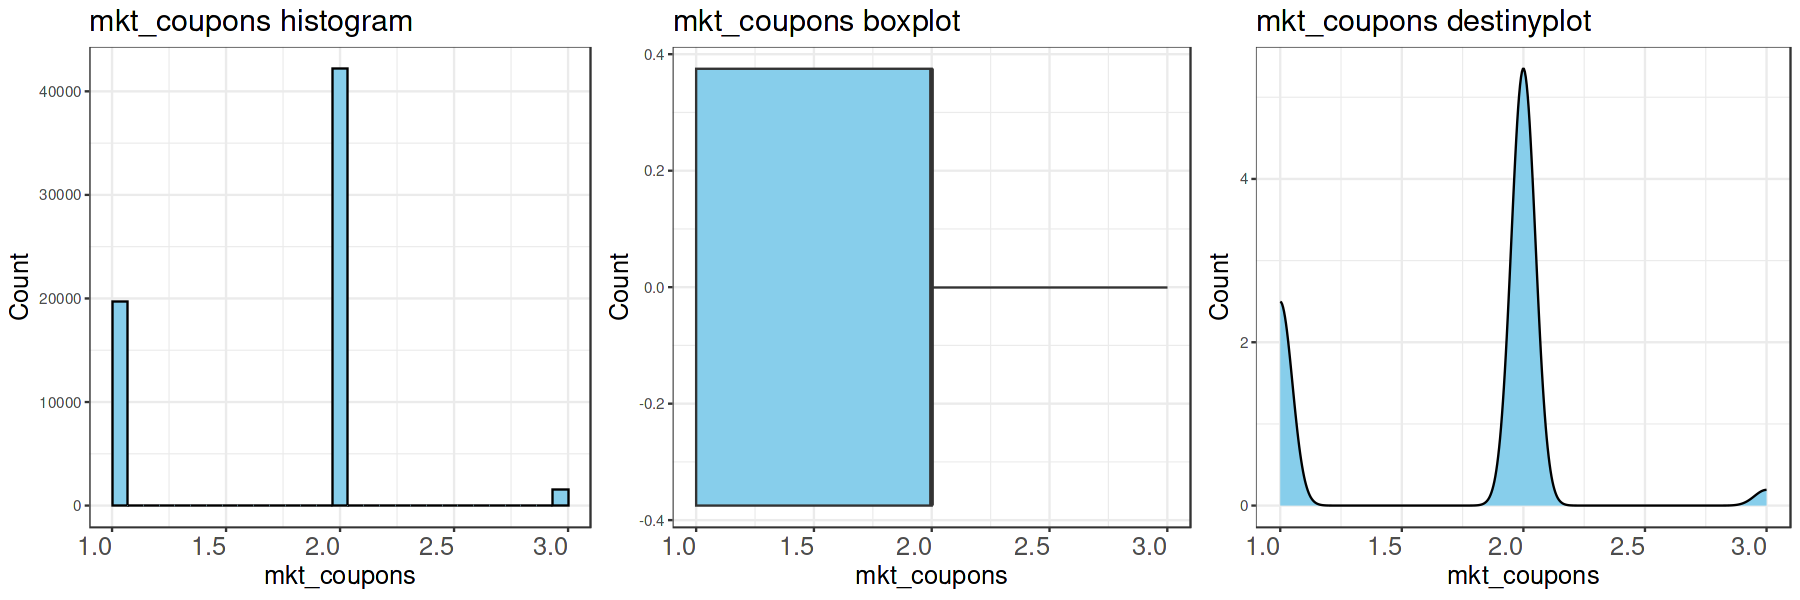

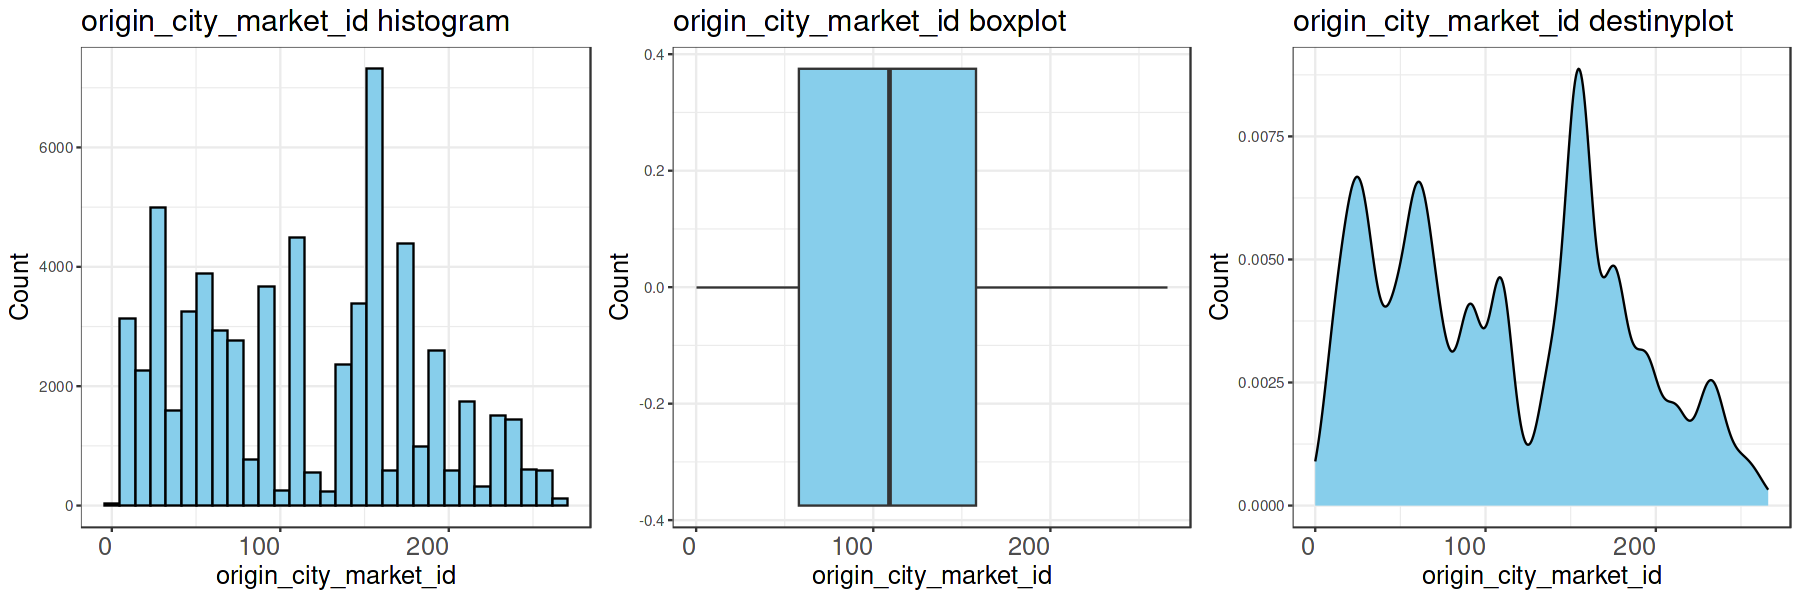

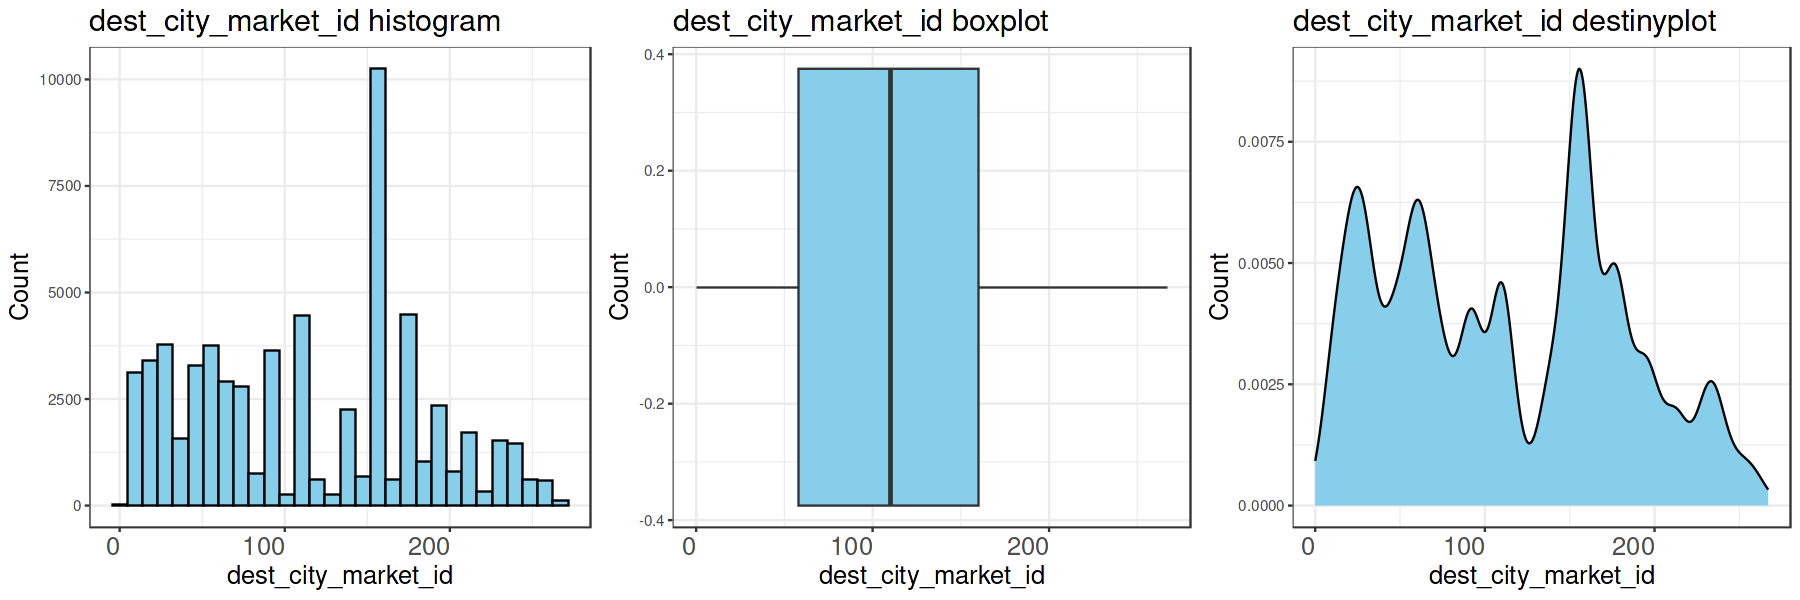

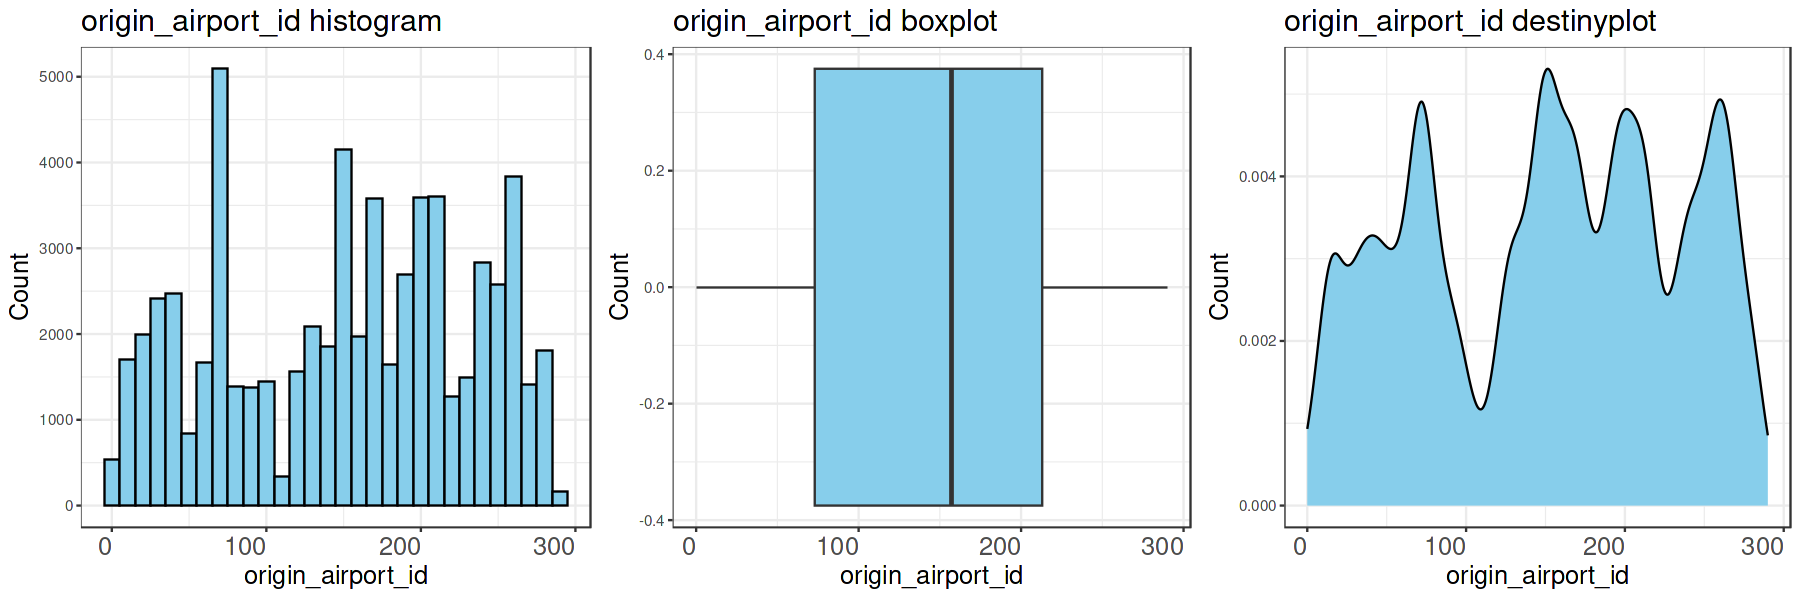

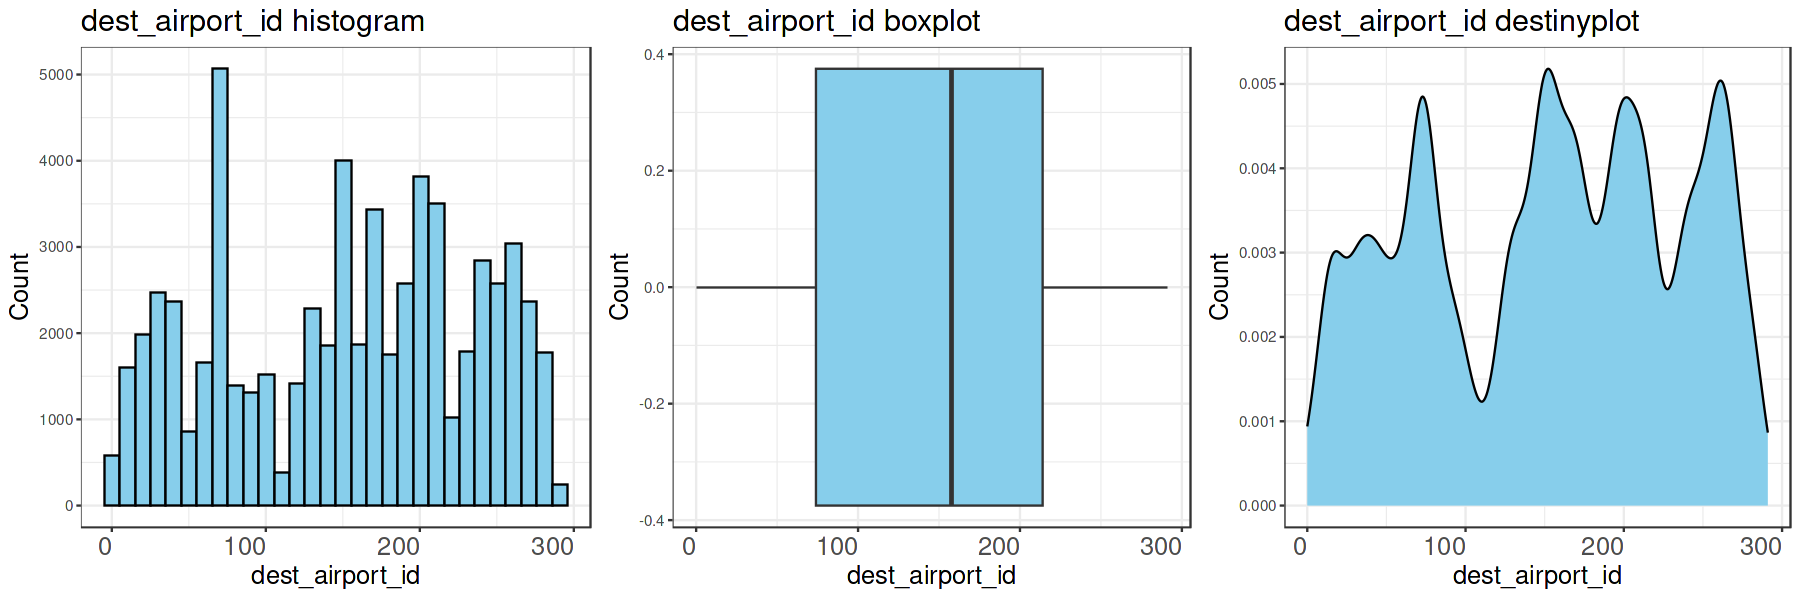

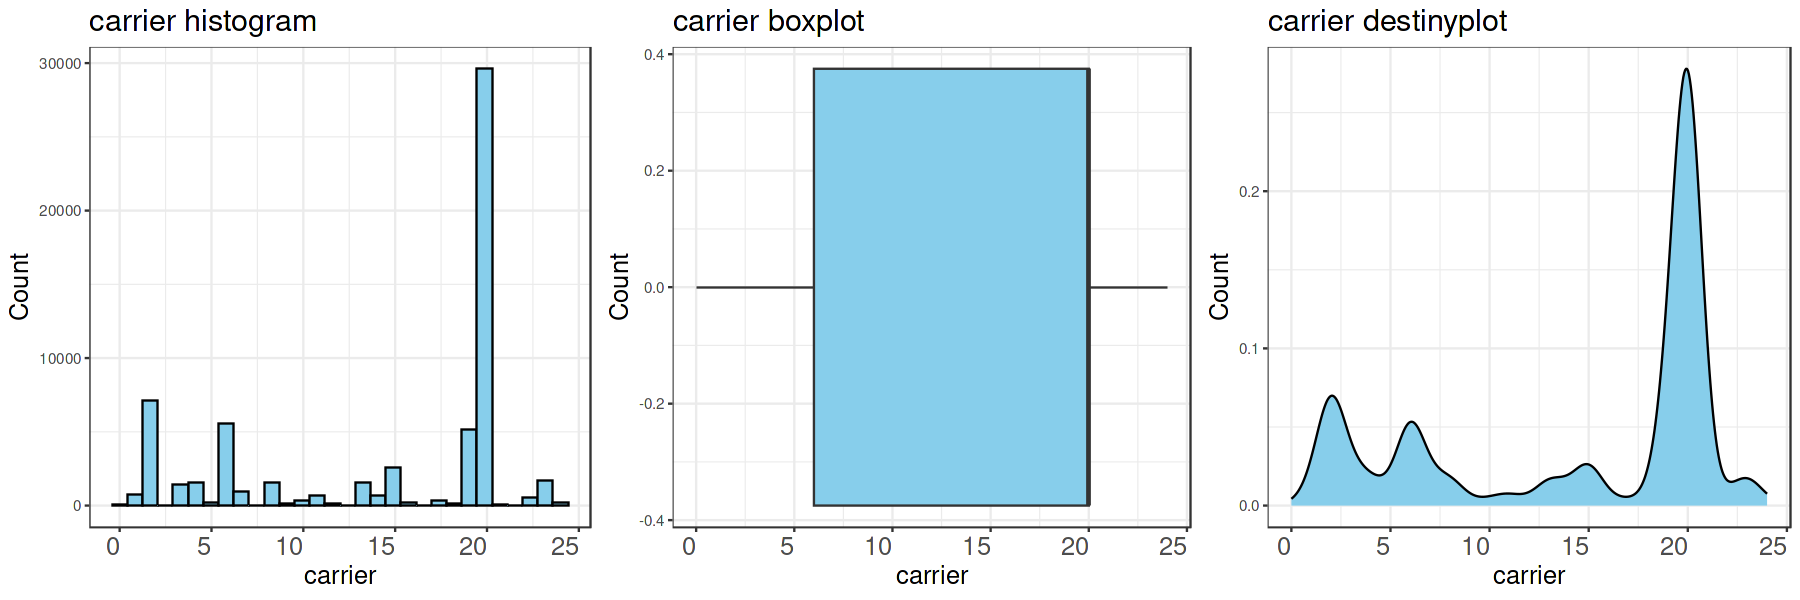

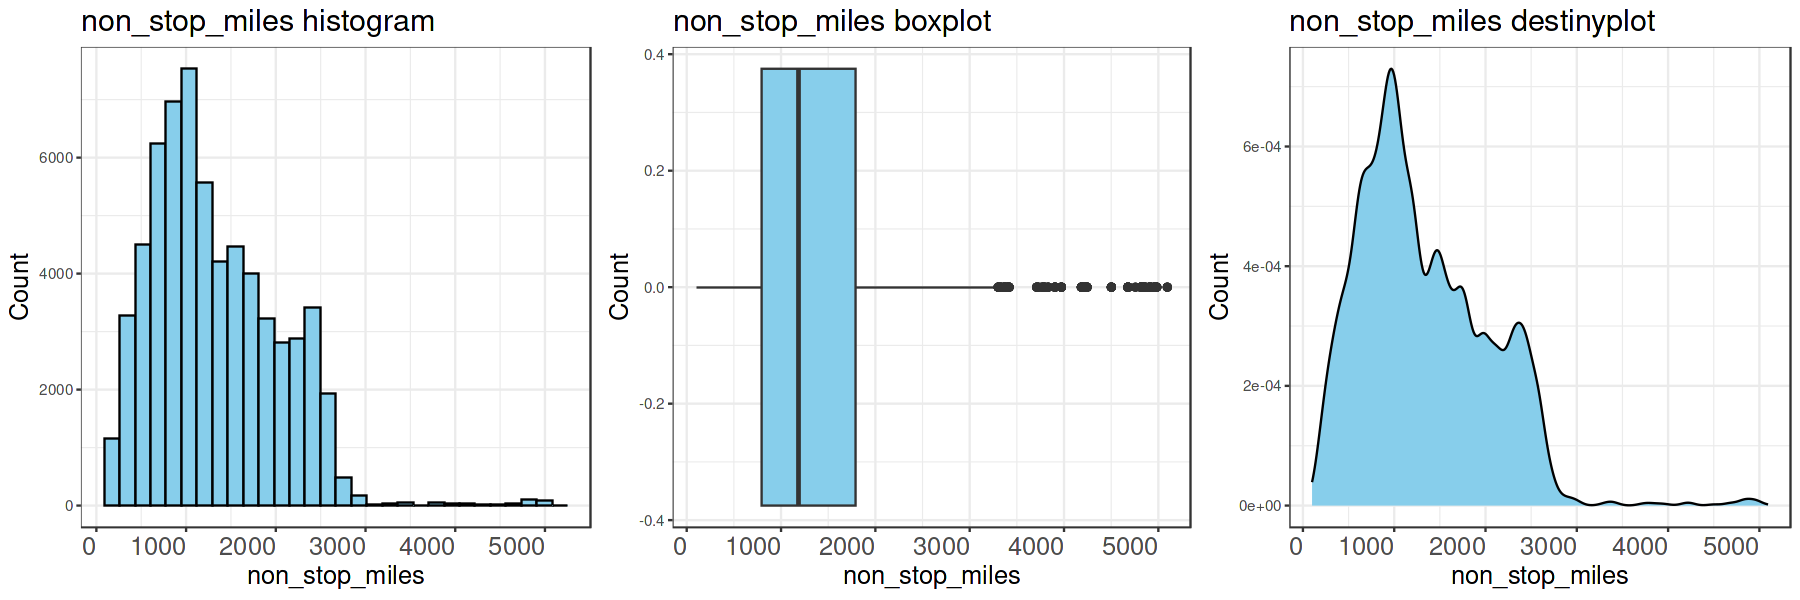

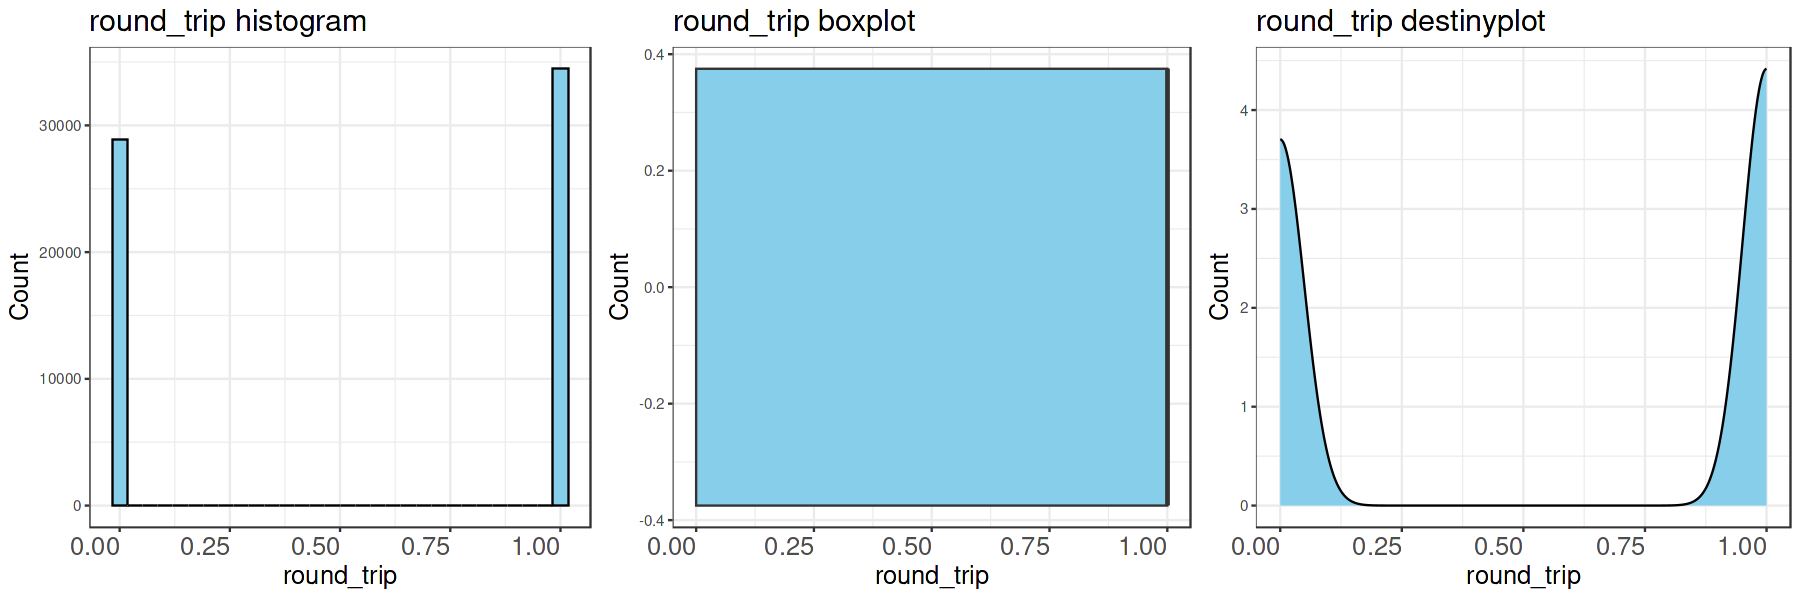

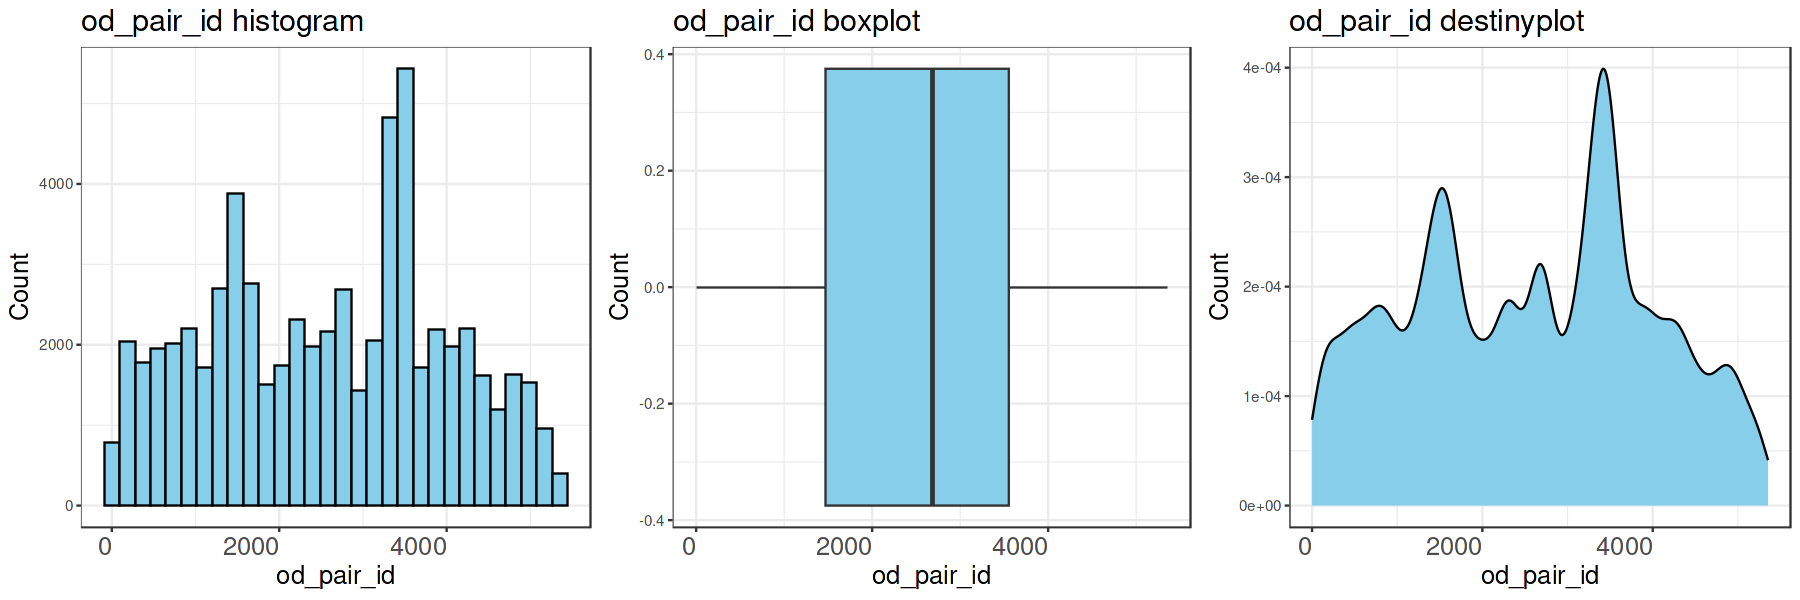

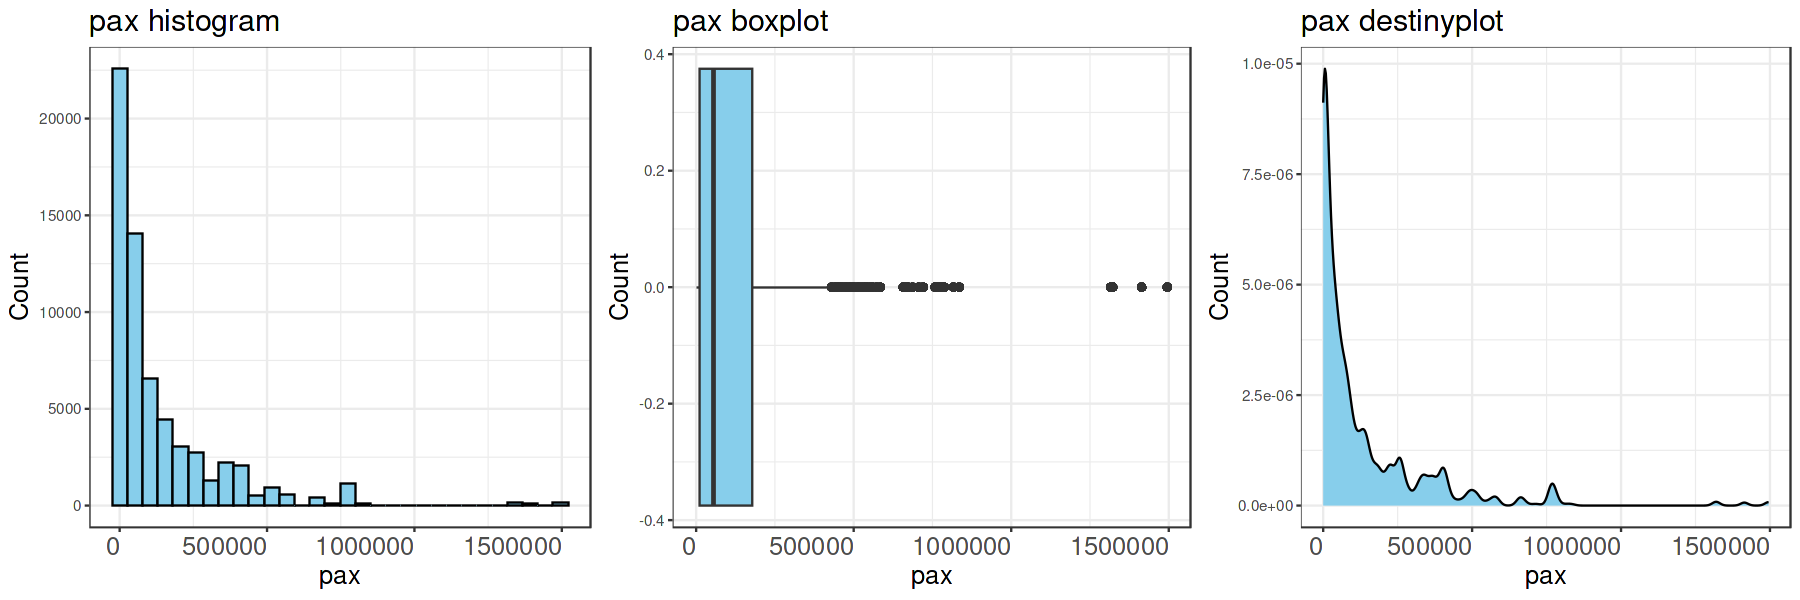

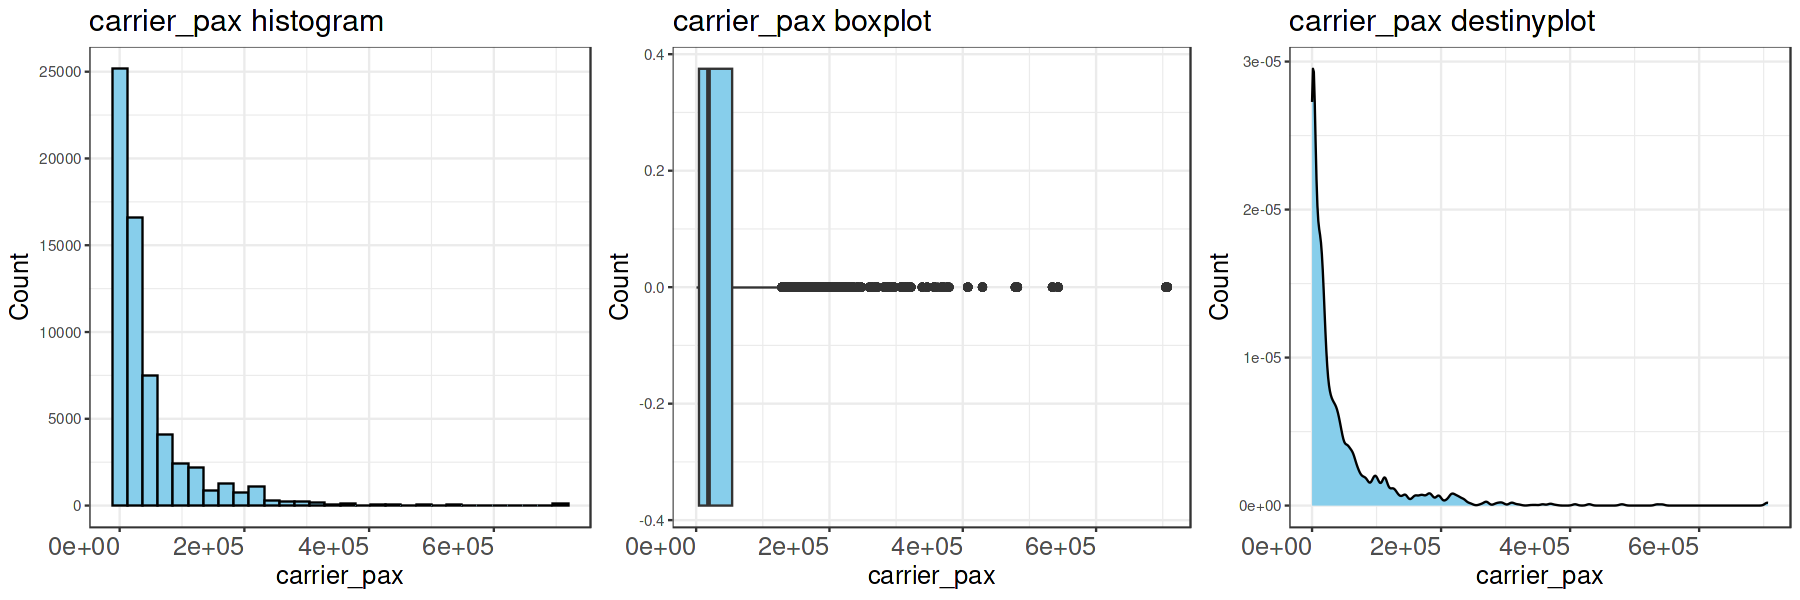

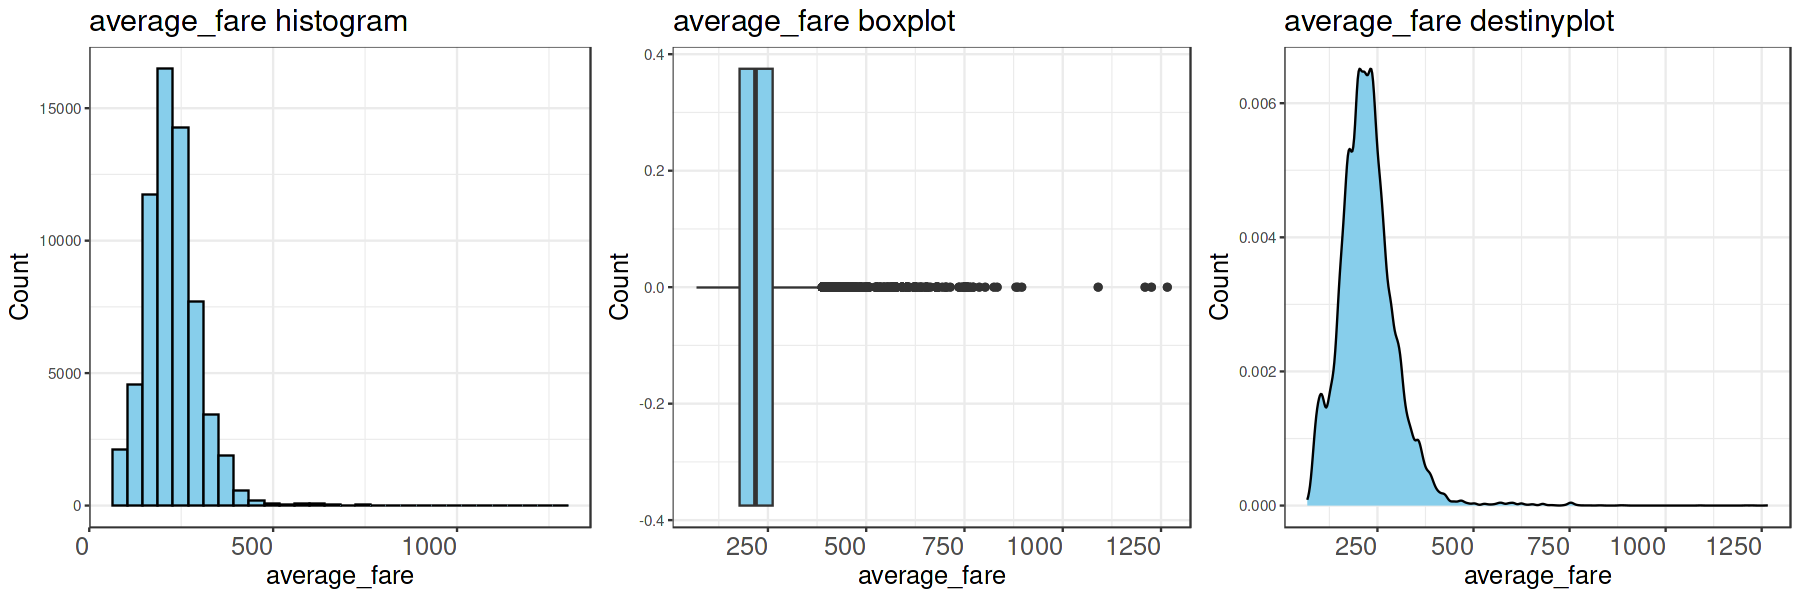

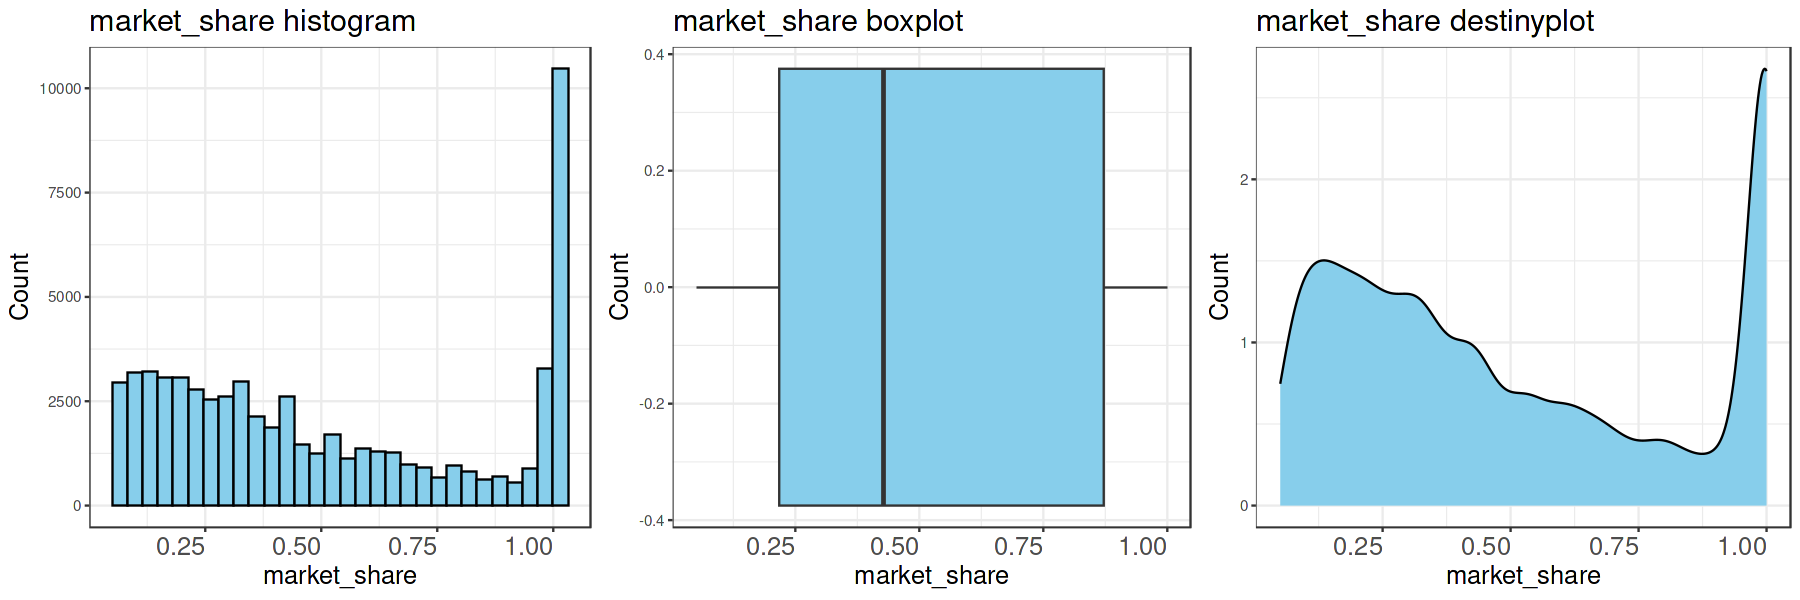

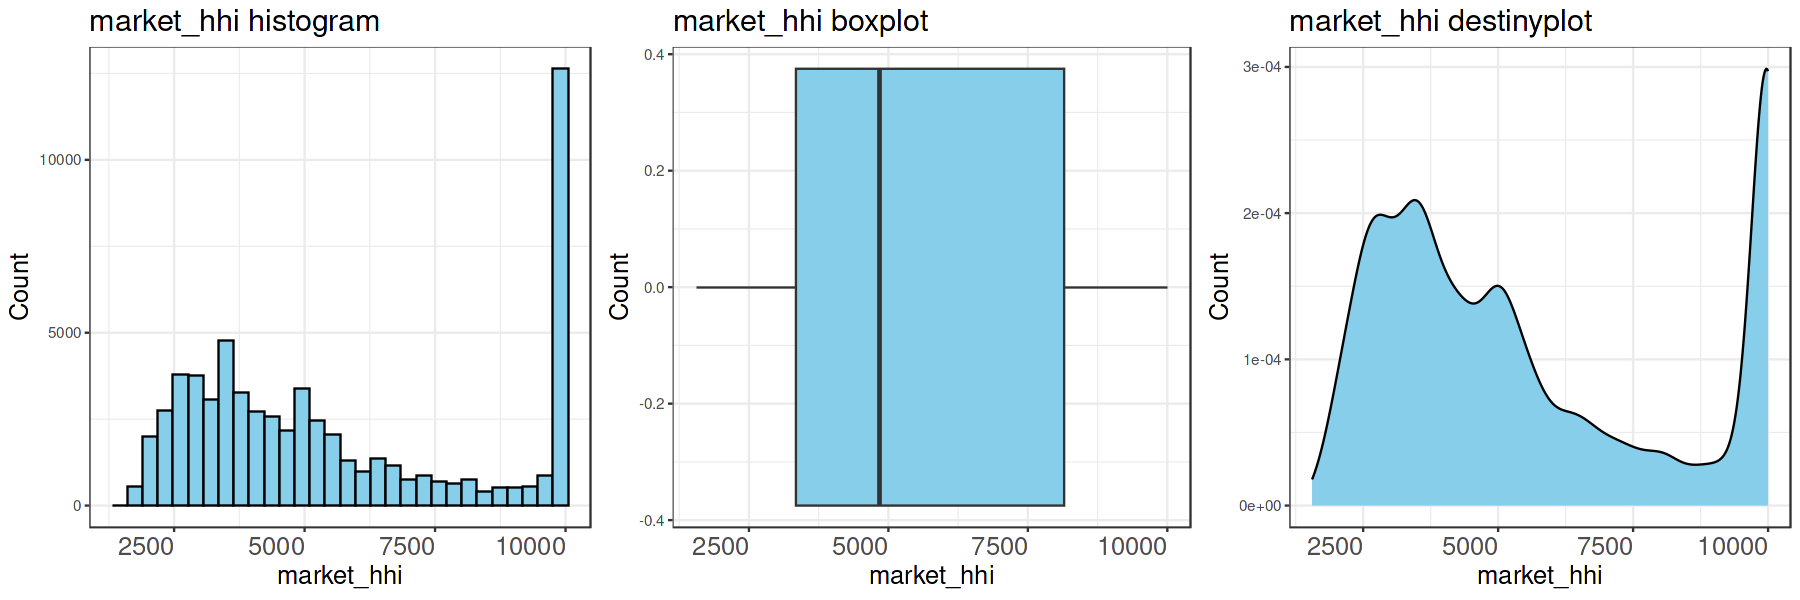

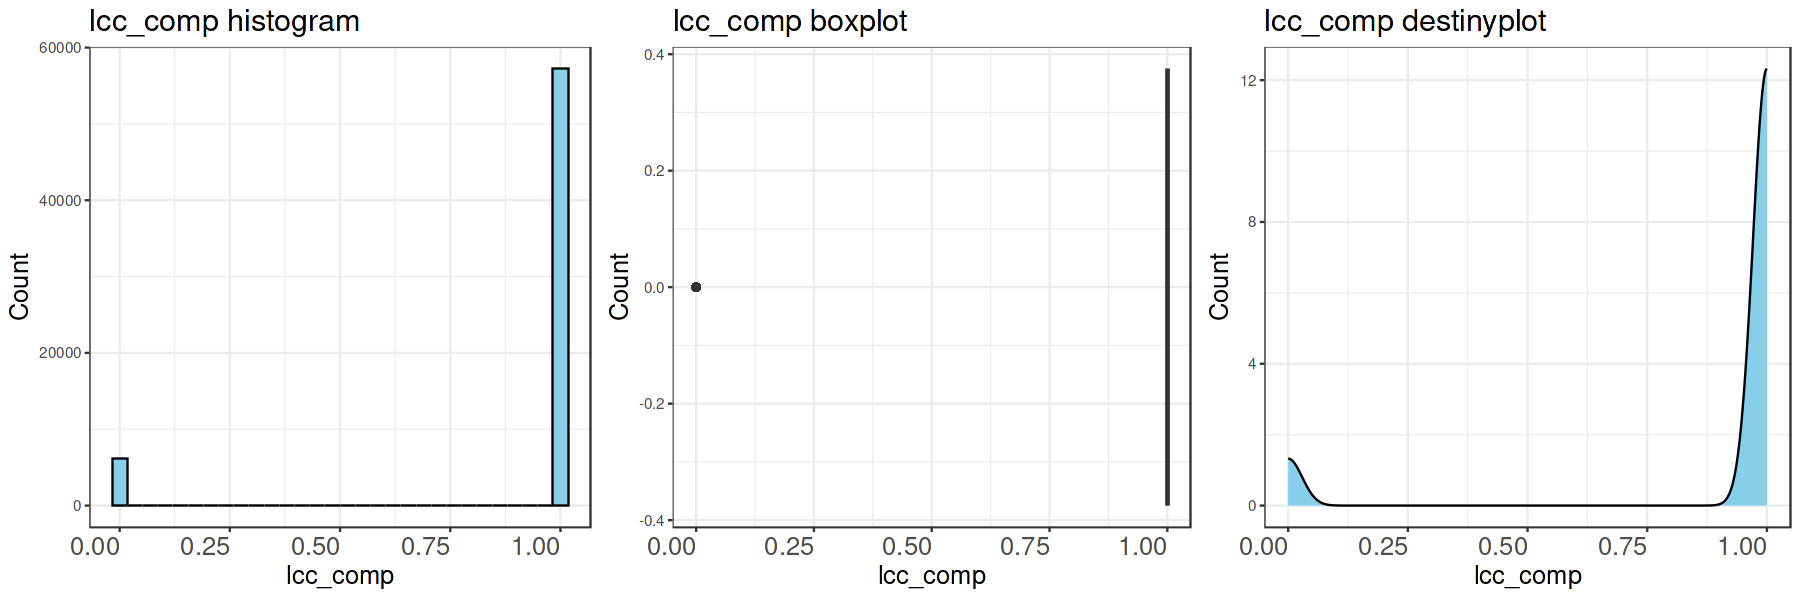

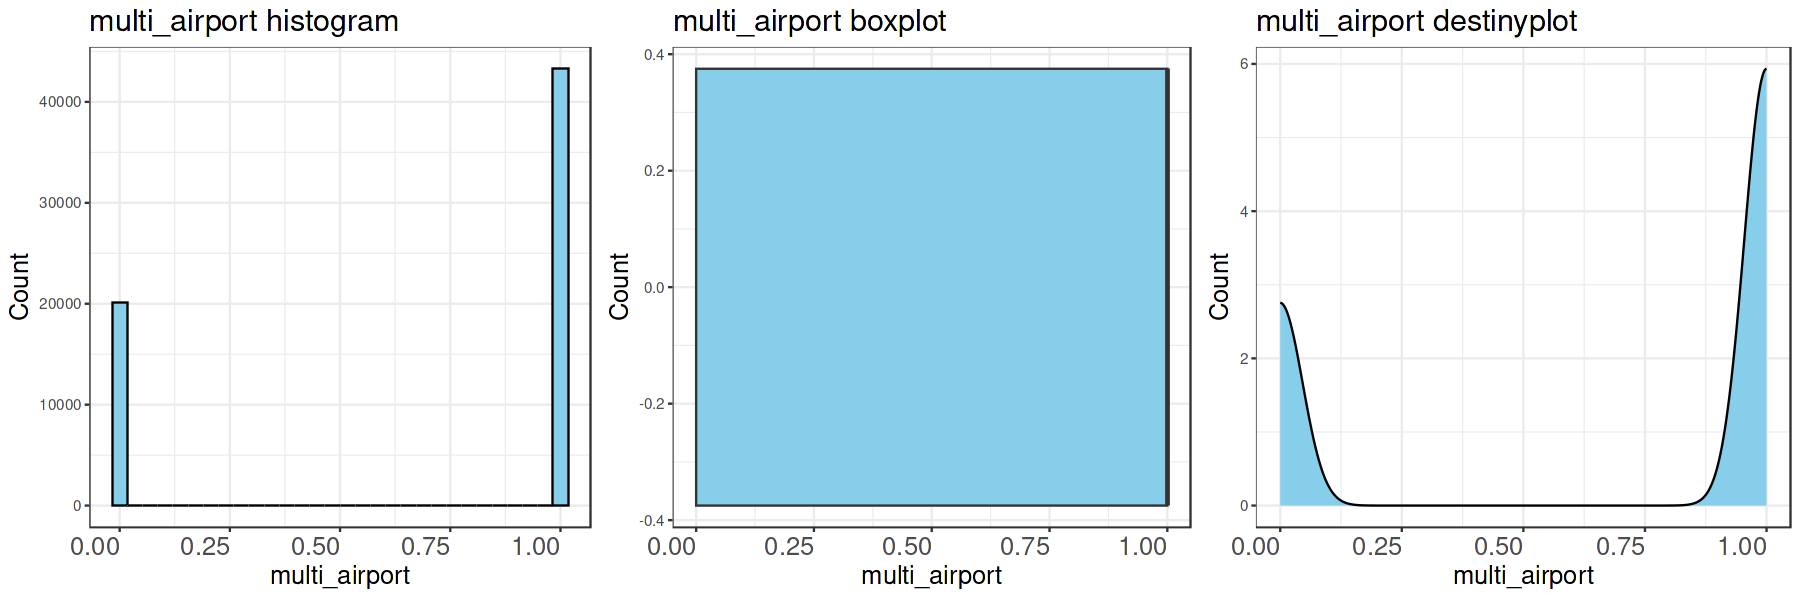

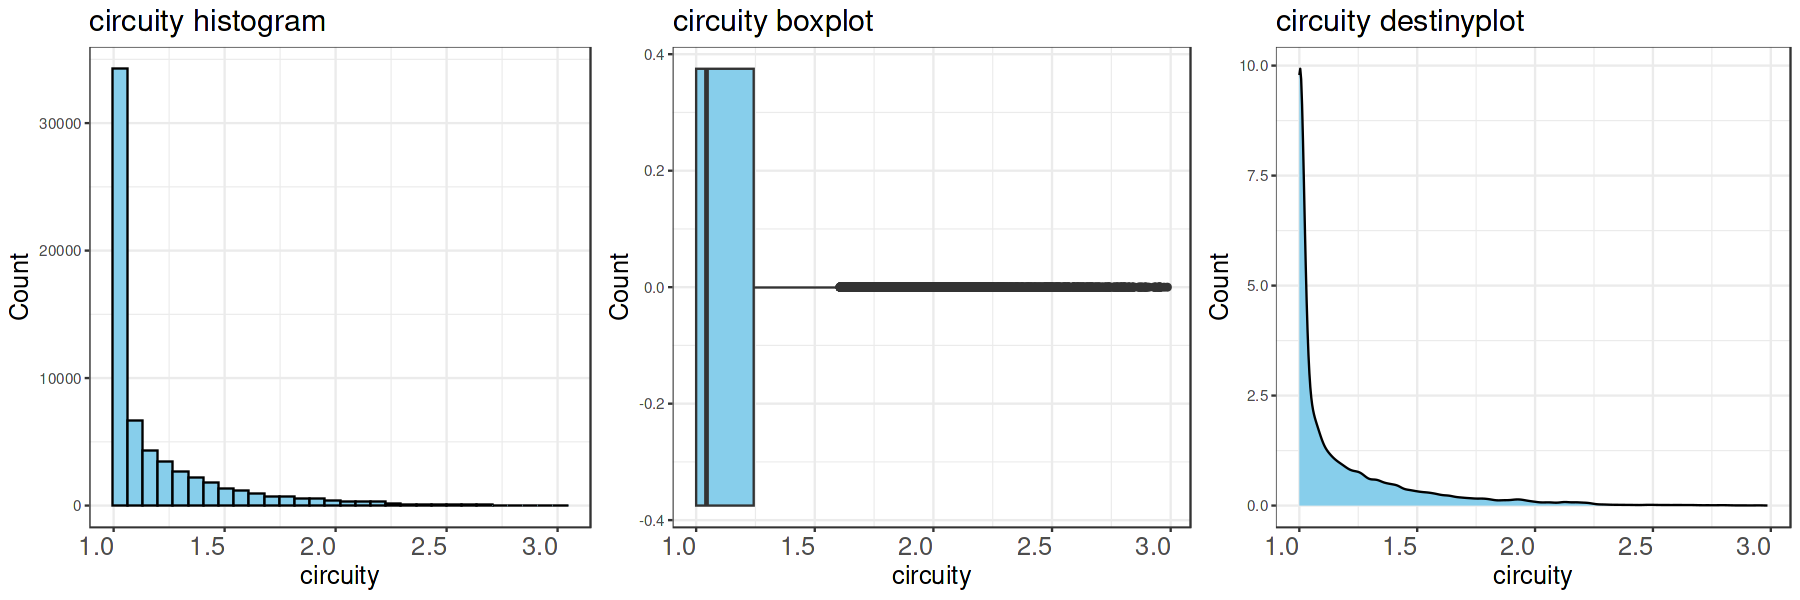

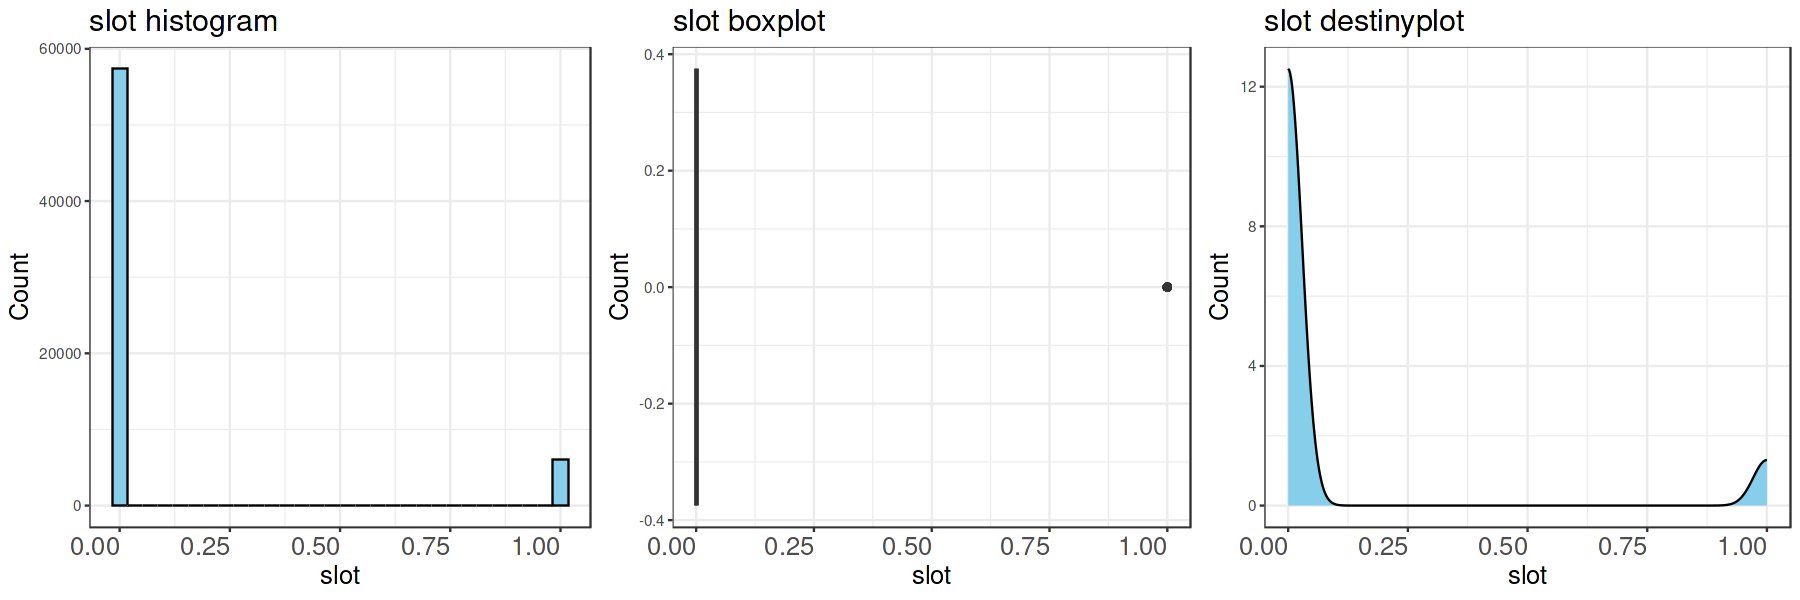

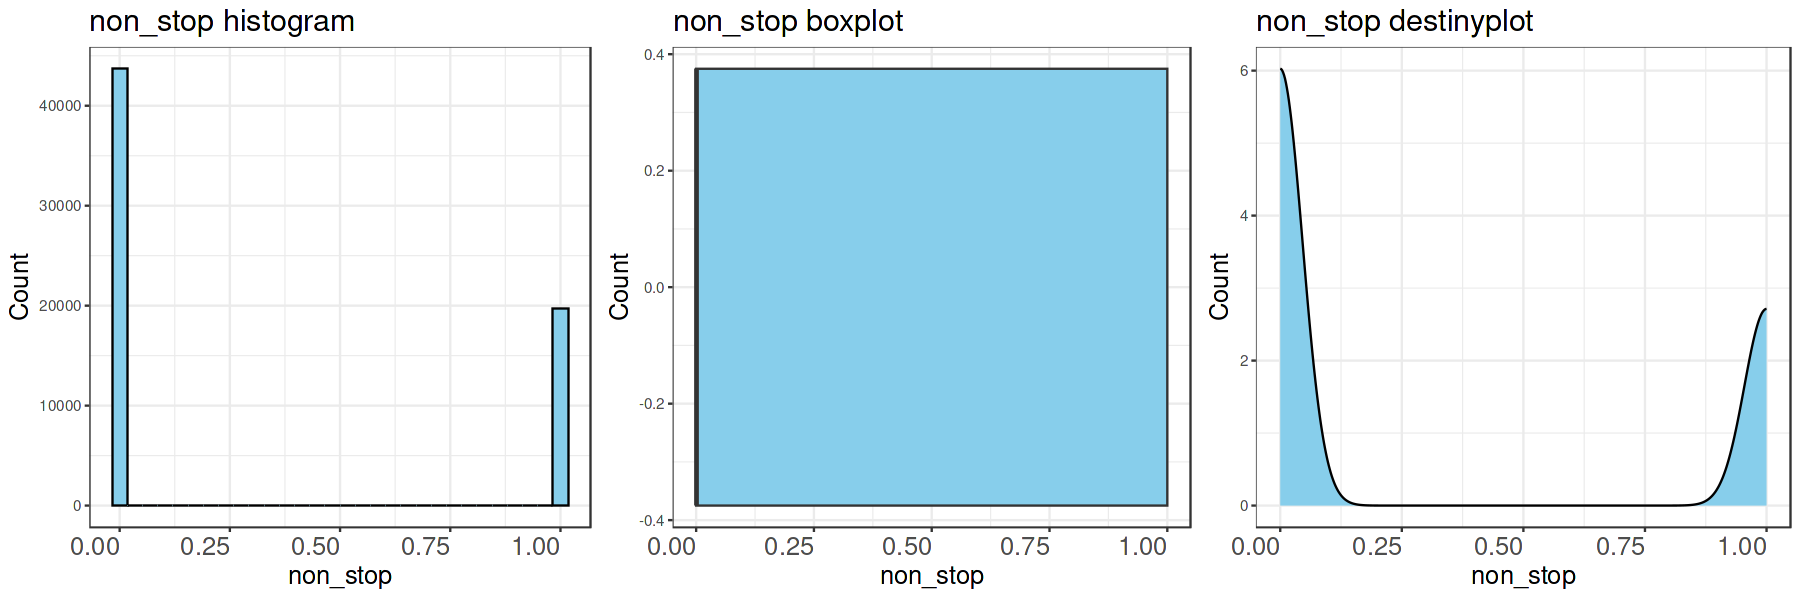

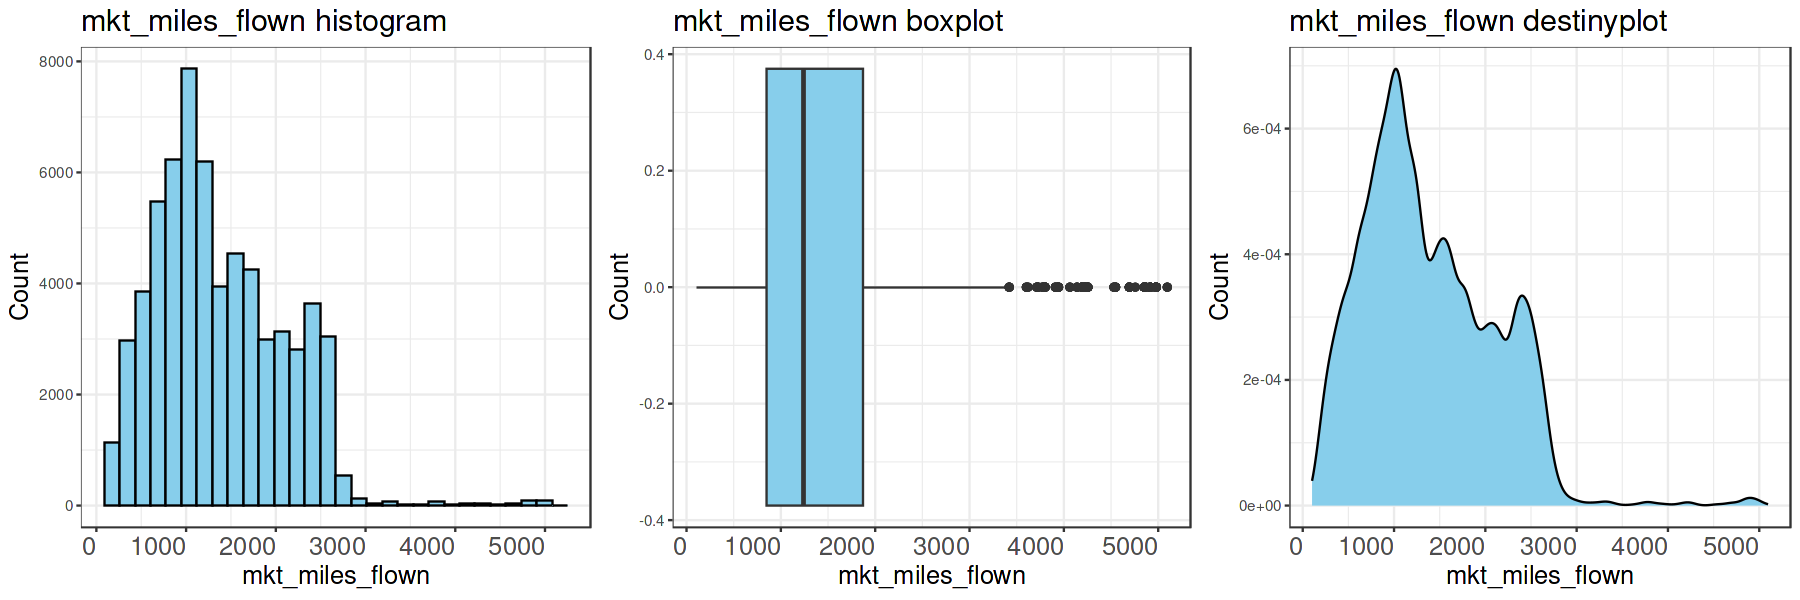

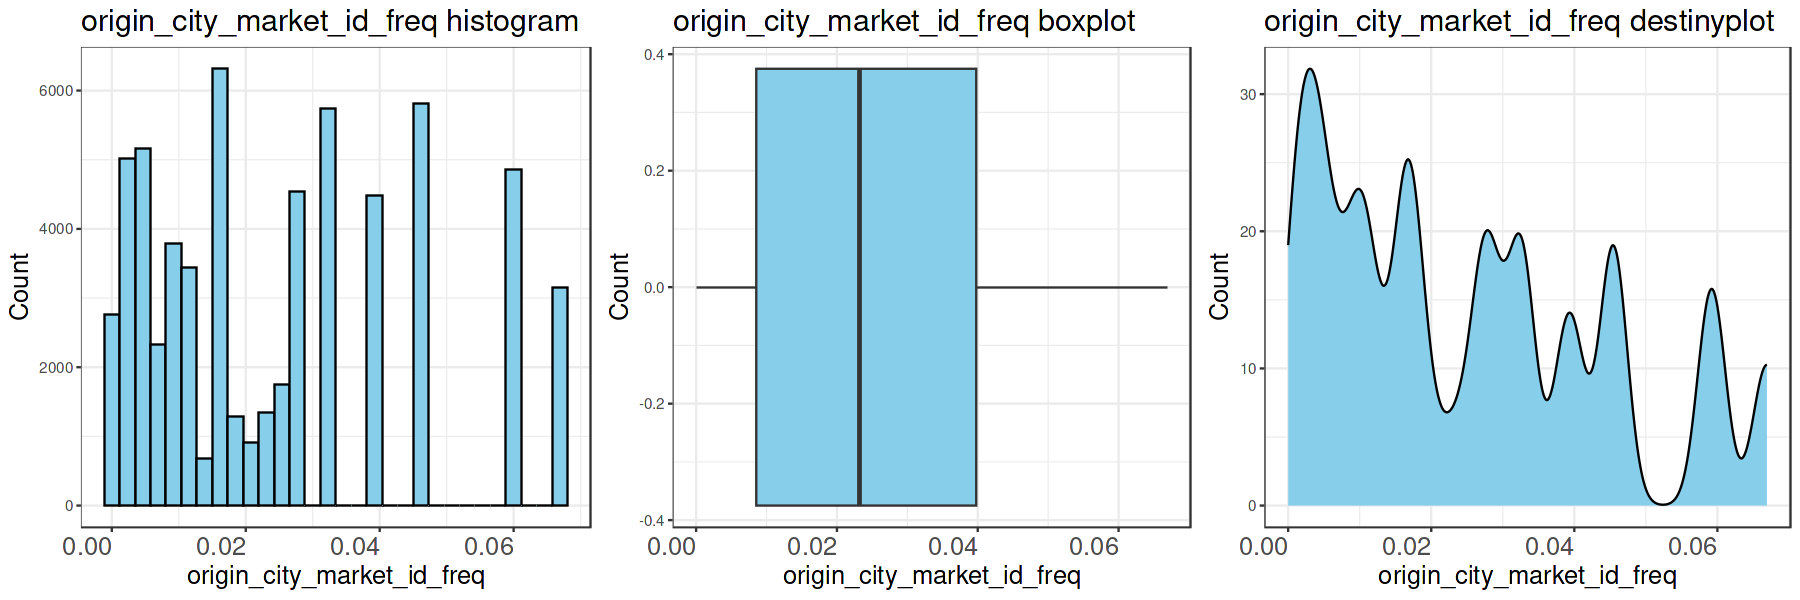

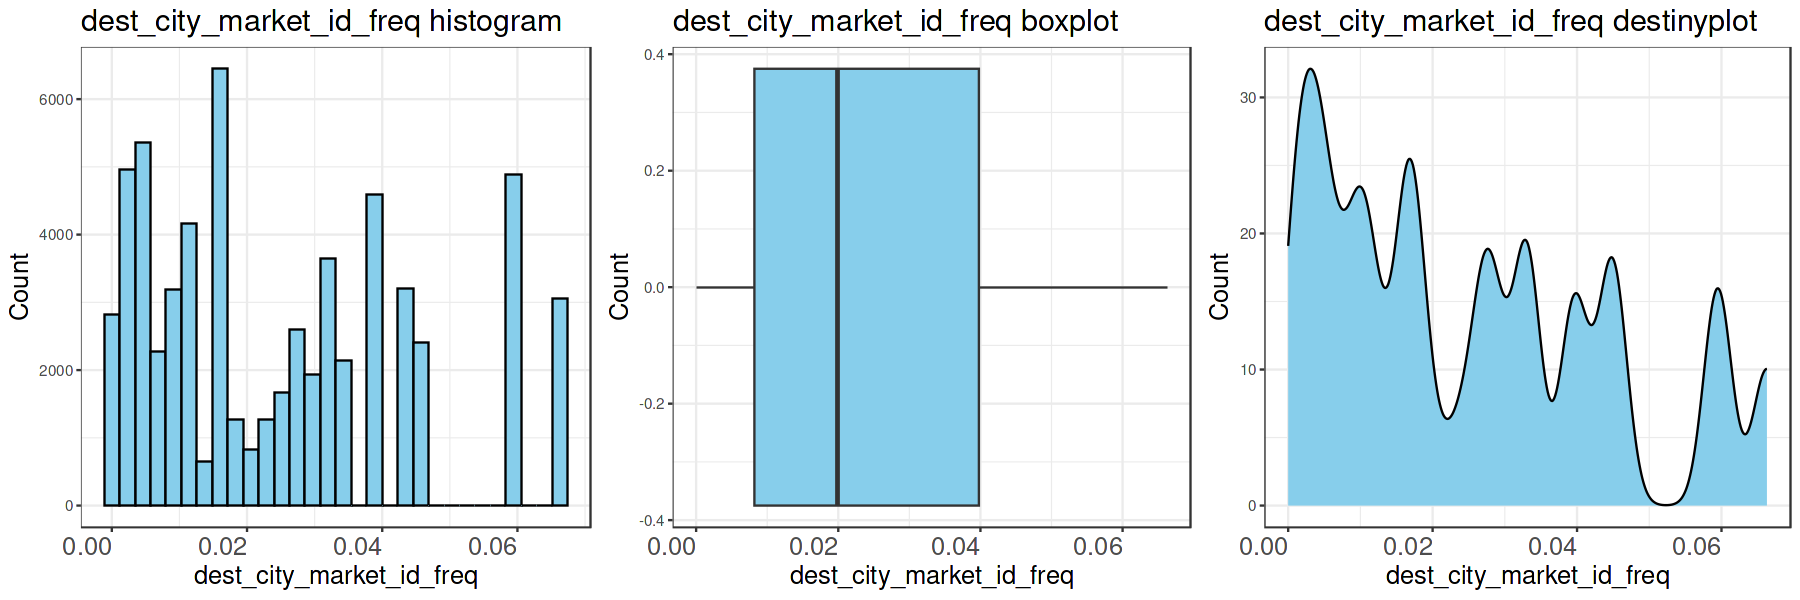

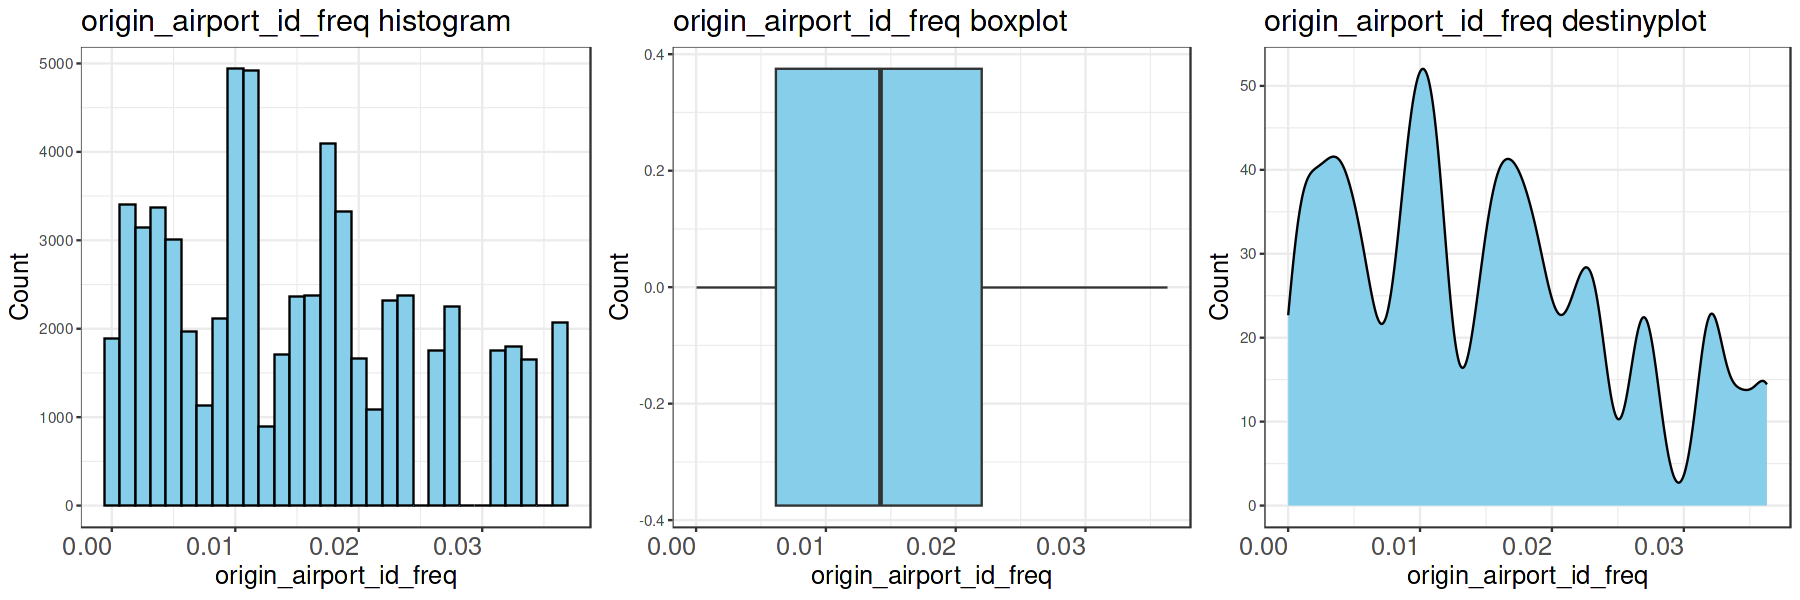

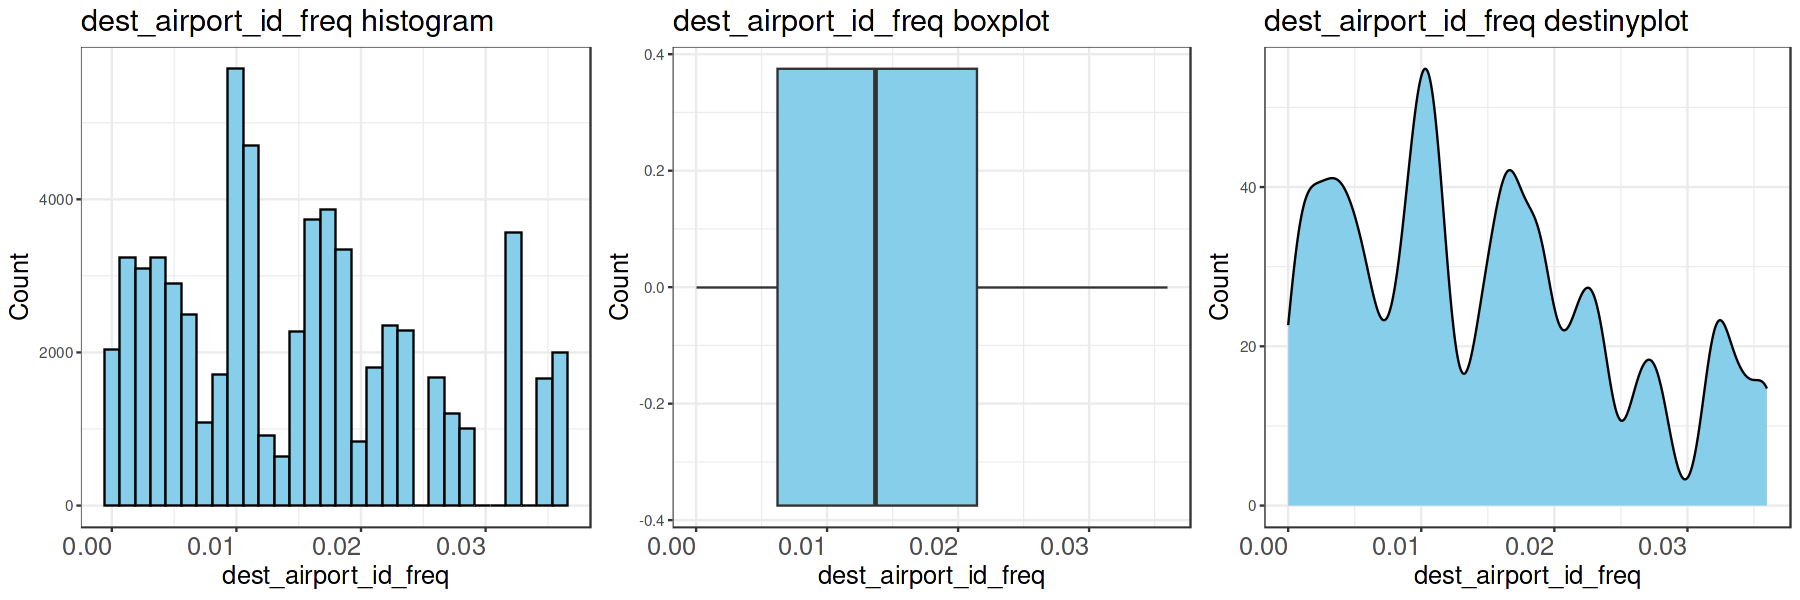

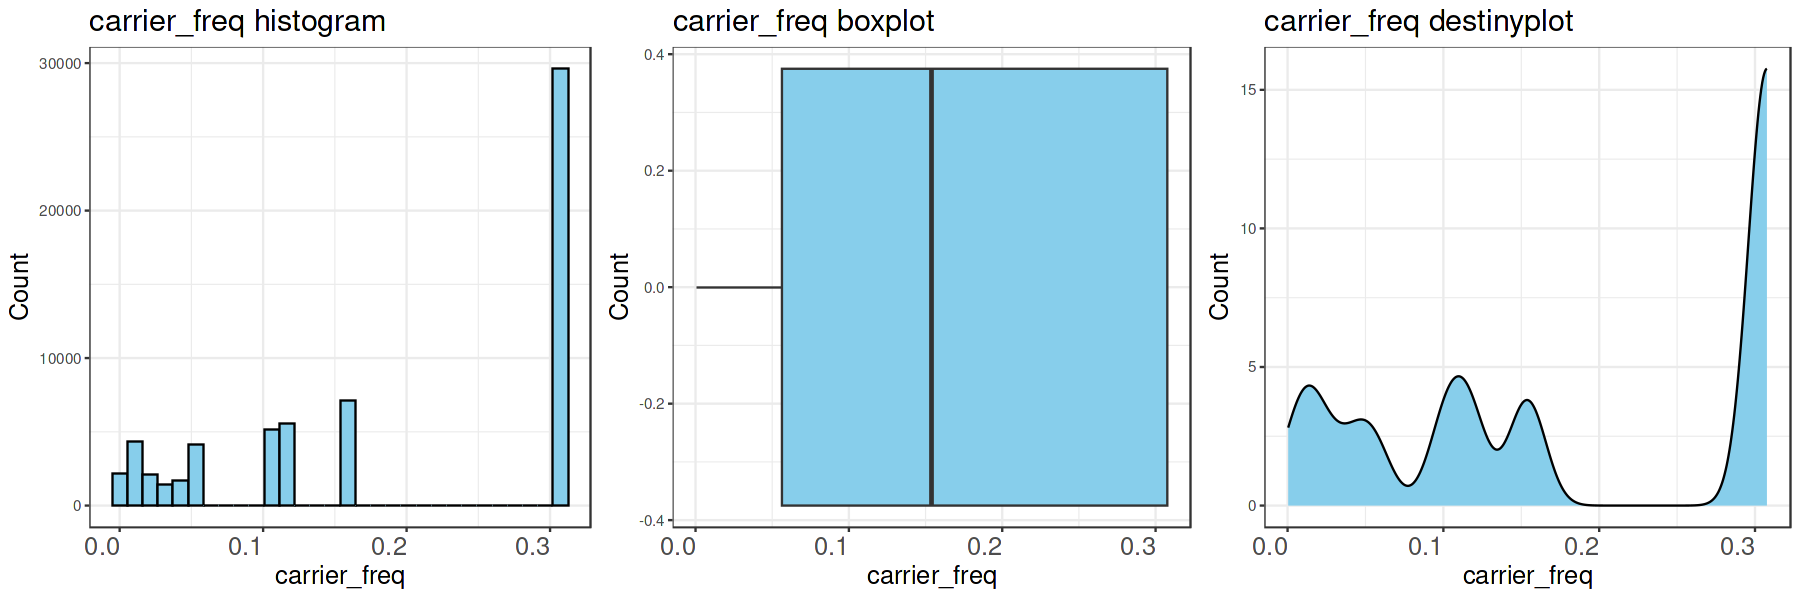

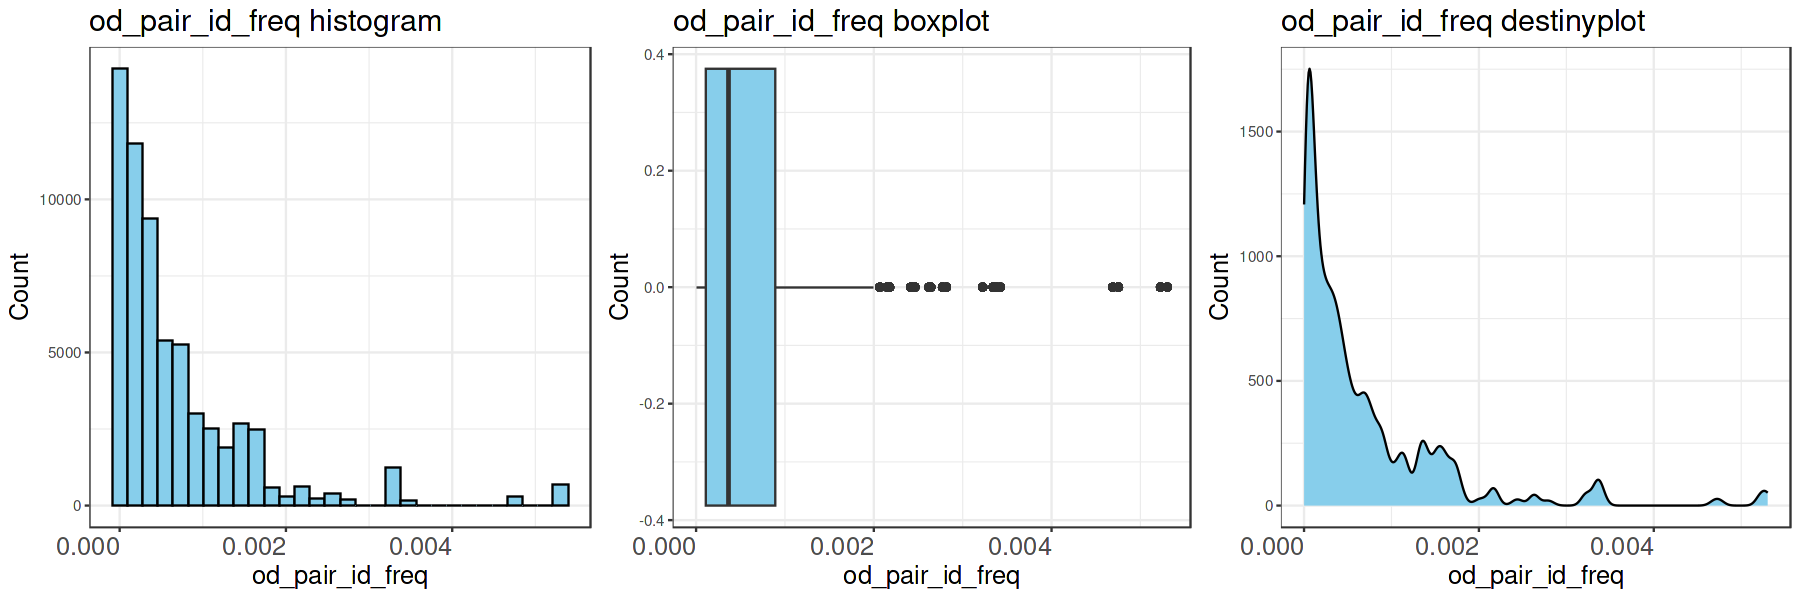

In [27]:
options(repr.plot.width = 15.0, repr.plot.height = 5.0)

for(i in col){
    a <- ggplot(df) + geom_histogram(aes(x= df[,i]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= df[,i]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b,c, ncol = 3)    
}

## **Correlation**

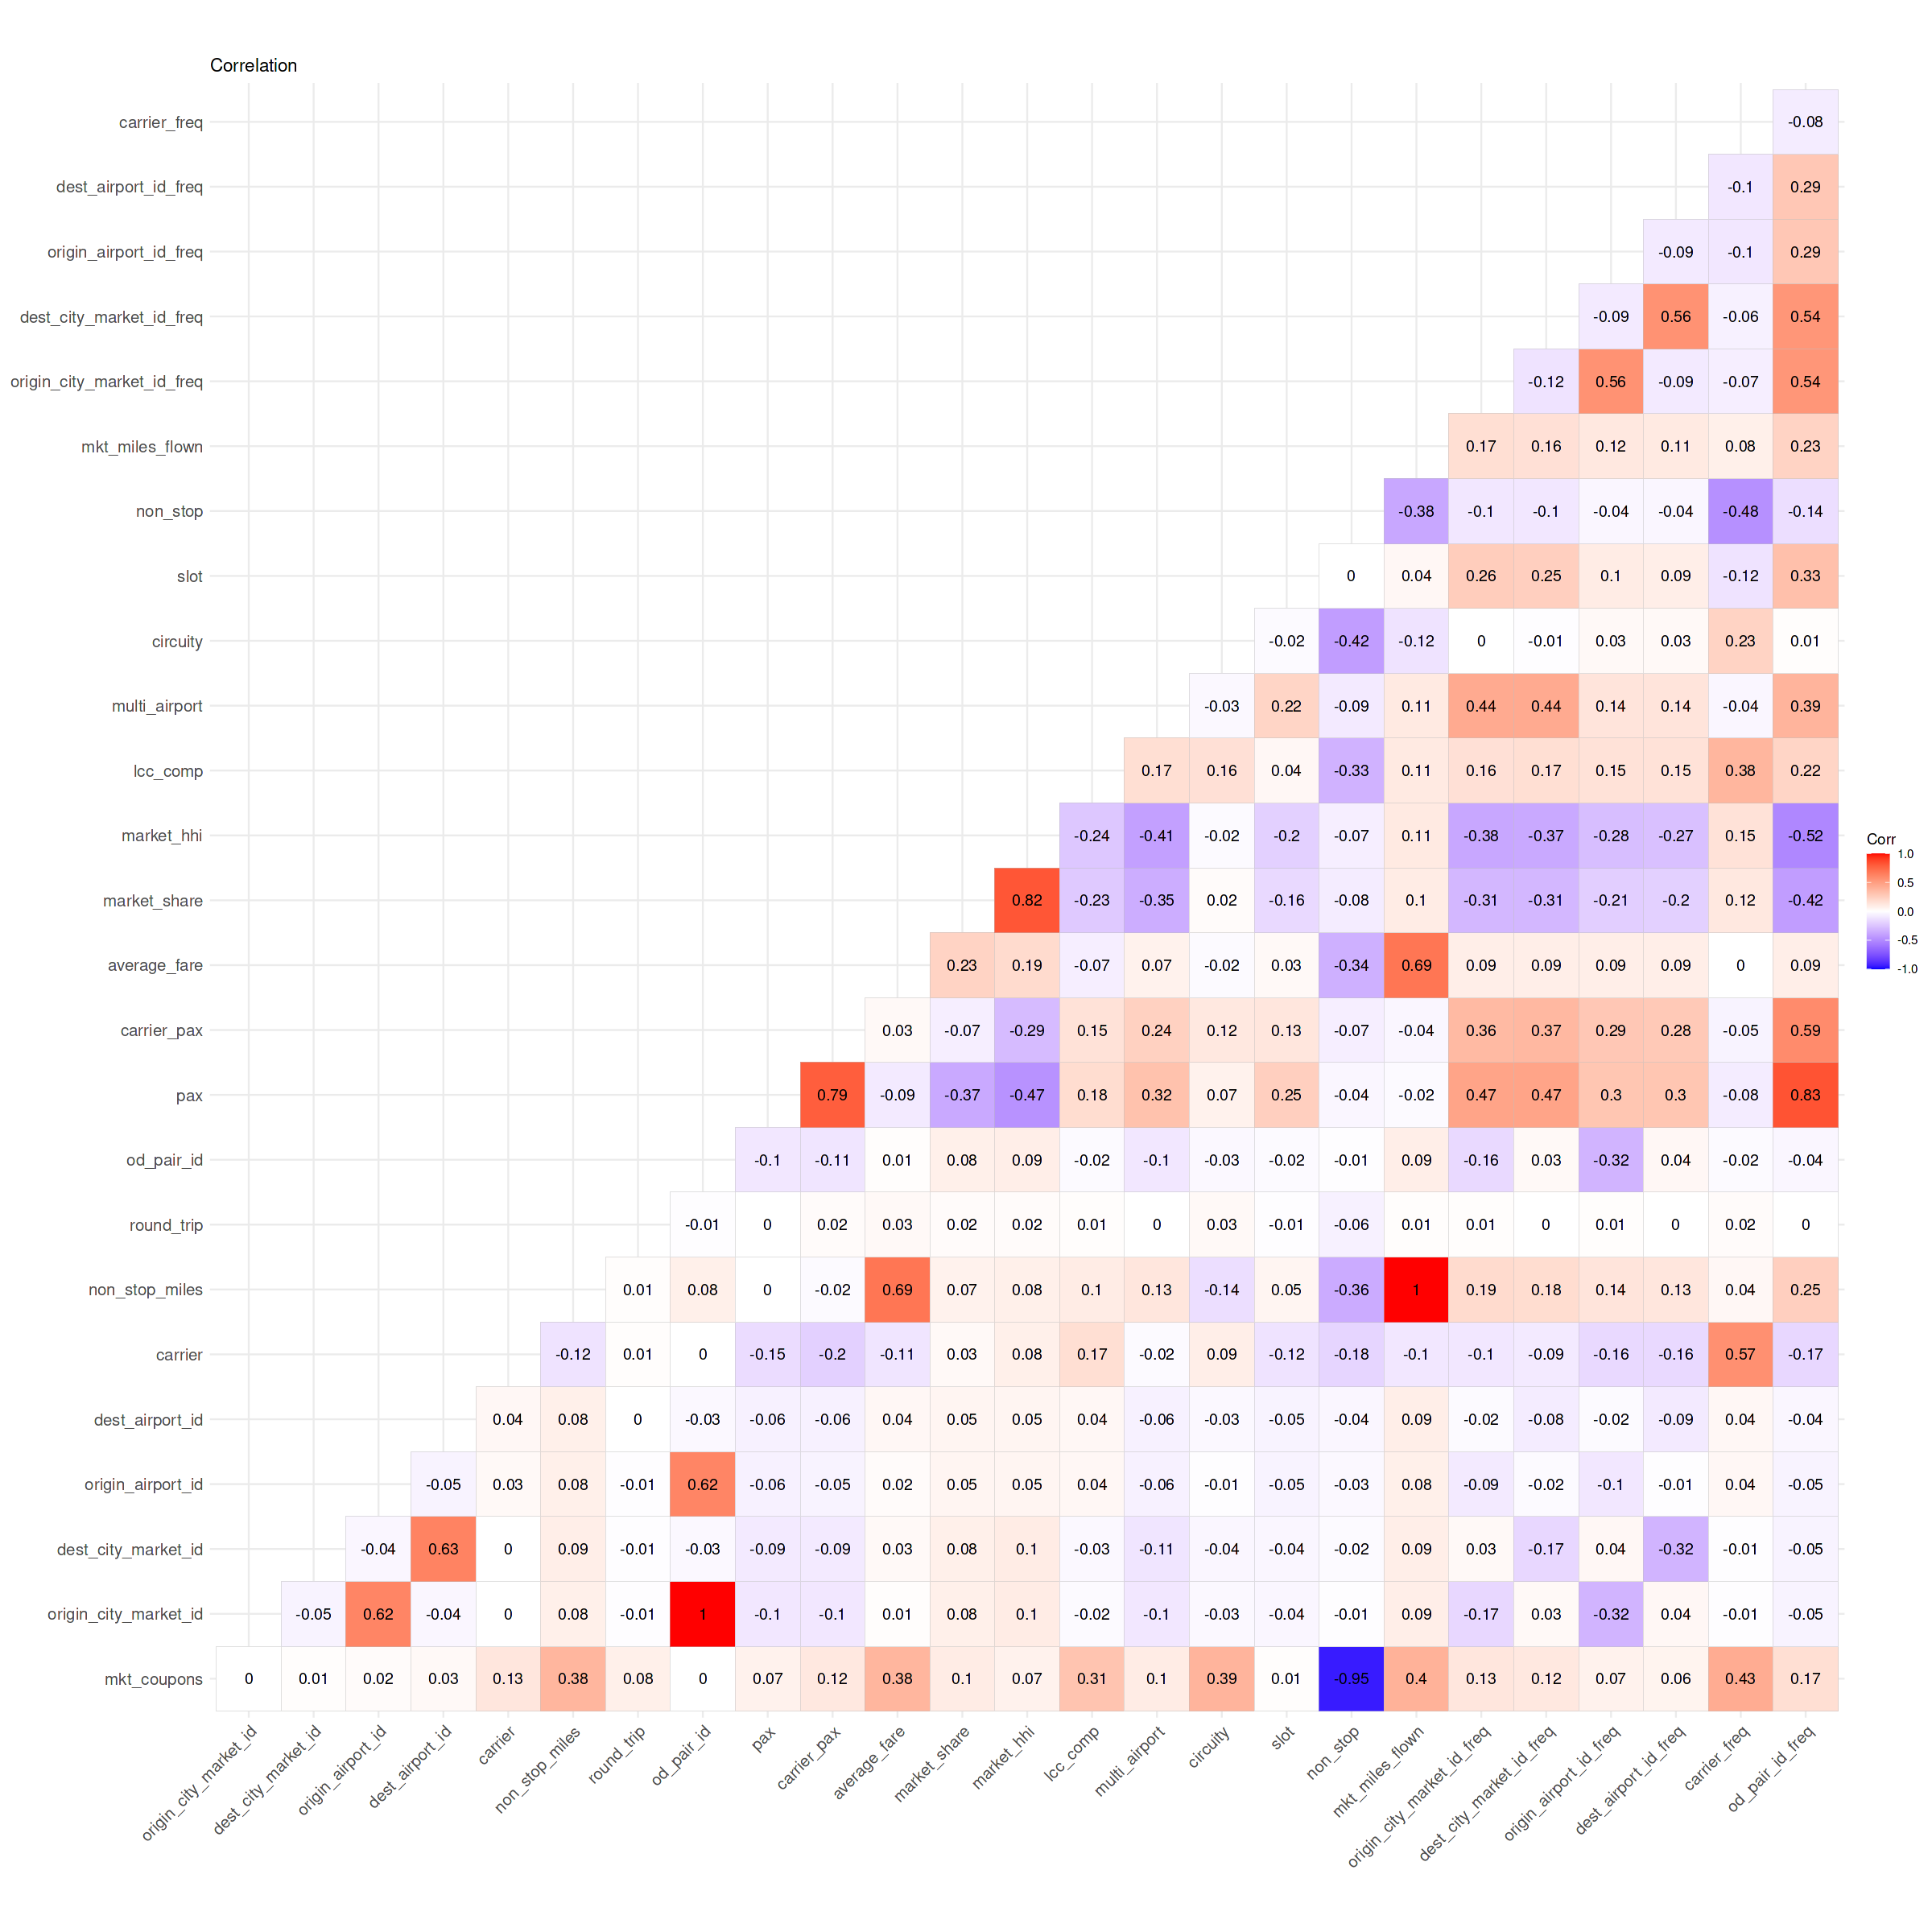

In [32]:
options(repr.plot.width = 20.0, repr.plot.height = 20.0)
ggcorrplot(cor(df, method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

## **Target Variable Visualization**

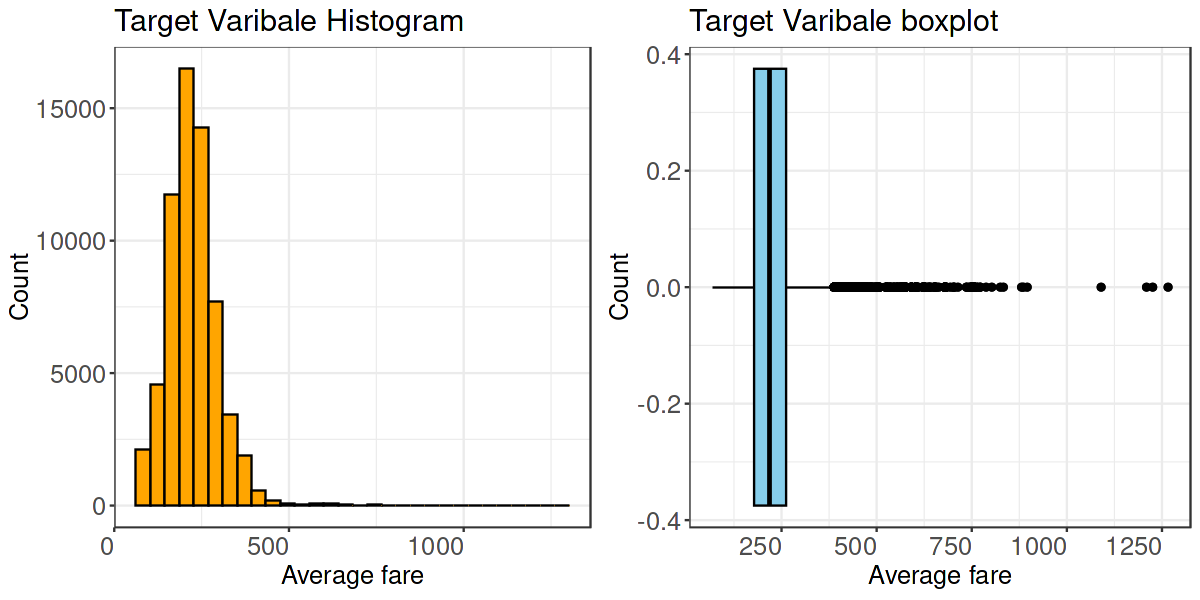

In [48]:
options(repr.plot.width = 10.0, repr.plot.height = 5.0)

a <- ggplot(df) + geom_histogram(aes(x = average_fare), fill = 'orange', col = 'black', position = 'dodge', bins= 30) +
        labs(title = 'Target Varibale Histogram', x = 'Average fare', y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

b <- ggplot(df) + geom_boxplot(aes(x = average_fare), fill = 'skyblue', col = 'black') +
        labs(title = 'Target Varibale boxplot', x = 'Average fare', y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

grid.arrange(a,b, ncol = 2)

Warning message in geom_smooth(aes(x = average_fare, y = non_stop_miles, method = "lm")):
“Ignoring unknown aesthetics: method”
`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


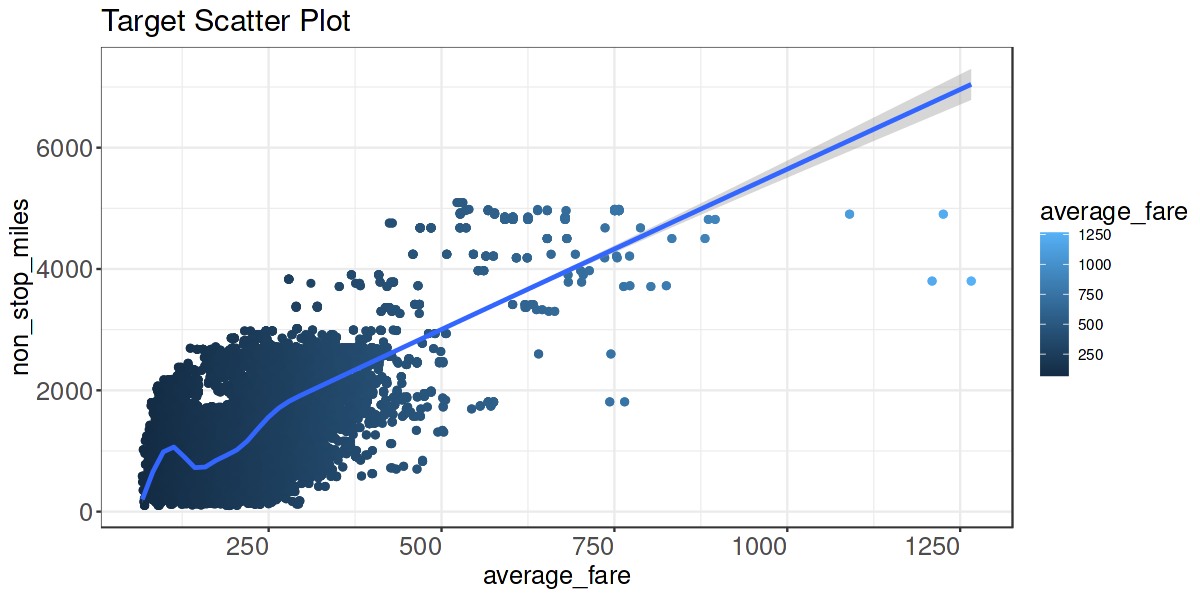

In [71]:
ggplot(df) + geom_point(aes(x = average_fare , y = non_stop_miles, color = average_fare)) +
            geom_smooth(aes(x = average_fare , y = non_stop_miles, method = 'lm'))+
            labs(title = 'Target Scatter Plot')+
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            axis.text.y = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )

# **4. Modeling.**

In [61]:
library(caret)
library(Metrics)

Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:yardstick’:

    precision, recall, sensitivity, specificity


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall


The following objects are masked from ‘package:yardstick’:

    accuracy, mae, mape, mase, precision, recall, rmse, smape




### **Model to use**
---------
**RandomForest**   
**XGBoost**   
**CatBoost**   

# **Data Preprocessing**

In [84]:
which(col == 'average_fare')

[1] 12

In [96]:
df_scale <- as.data.frame(scale(df[,-12]))
df_scale$average_fare <- df$average_fare

## **Train Test Split**

In [116]:
split <- rsample::initial_split(df_scale, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [122]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = average_fare)

In [126]:
rec <- recipes::recipe(average_fare ~ ., data = train) %>%
    recipes::step_corr(all_predictors(), threshold = 0.8)

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:    1
predictor: 25



── Operations 

• Correlation filter on: all_predictors()



##  **RF**

In [130]:
# RandomForest Model
rf_model <- rand_forest() %>% set_engine("ranger") %>% 
    set_mode("regression")

# Workflow
rf_wf <- workflow() %>% 
    add_recipe(rec) %>% 
    add_model(rf_model)

# Fit
rf_fit <- rf_wf %>%
    fit(data = train)

# Predict
rf_pred <- rf_fit %>% 
  predict(new_data = test)

In [131]:
rf_mse <- mse(test$average_fare , rf_pred$.pred)
rf_rmse <- rmse(test$average_fare ,rf_pred$.pred)
rf_mae <- mae(test$average_fare ,rf_pred$.pred)
rf_r2 <- R2(test$average_fare ,rf_pred$.pred)

In [132]:
options(scipen = 100)

rf_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(rf_mse,rf_rmse ,rf_mae, rf_r2 ))
rf_score

Indicators,Score
<chr>,<dbl>
MSE,137.966686
RMSE,11.745922
MAE,5.173256
R2,0.975493


## **XGB**

In [133]:
# Model
xgb <-
  boost_tree() %>%
  set_engine(engine = "xgboost", ) %>%
  set_mode(mode = "regression")

# Workflow
xgb_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(xgb)

# Fit
xgb_fit <- xgb_wf %>% 
  fit(data = train)

# Predict
xgb_pred <- xgb_fit %>% 
  predict(new_data = test)

In [134]:
xgb_mse <- mse(test$average_fare , xgb_pred$.pred)
xgb_rmse <- rmse(test$average_fare ,xgb_pred$.pred)
xgb_mae <- mae(test$average_fare ,xgb_pred$.pred)
xgb_r2 <- R2(test$average_fare ,xgb_pred$.pred)

In [135]:
xgb_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(xgb_mse,xgb_rmse ,xgb_mae, xgb_r2 ))
xgb_score

Indicators,Score
<chr>,<dbl>
MSE,589.9614967
RMSE,24.2891230
MAE,17.4848320
R2,0.8933899


## **LGBM**

In [150]:
library(bonsai)

# Model
lgbm <-
  boost_tree() %>%
  set_engine(engine = "lightgbm",
             method = "catboost" ) %>%
  set_mode(mode = "regression")

# Workflow
lgbm_wf <- workflow() %>%
  add_recipe(rec) %>% 
  add_model(lgbm)

# Fit
lgbm_fit <- lgbm_wf %>% 
  fit(data = train)

# Predict
lgbm_pred <- lgbm_fit %>% 
  predict(new_data = test)

In [151]:
lgbm_mse <- mse(test$average_fare , lgbm_pred$.pred)
lgbm_rmse <- rmse(test$average_fare ,lgbm_pred$.pred)
lgbm_mae <- mae(test$average_fare ,lgbm_pred$.pred)
lgbm_r2 <- R2(test$average_fare ,lgbm_pred$.pred)

In [152]:
lgbm_score <- data.frame(Indicators = c('MSE','RMSE','MAE','R2') , Score = c(lgbm_mse,lgbm_rmse ,lgbm_mae, lgbm_r2 ))
lgbm_score

Indicators,Score
<chr>,<dbl>
MSE,497.5274731
RMSE,22.3053239
MAE,15.5941934
R2,0.9093111


## **Model Compare**

In [154]:
#overall score
overall_score <- data.frame(Model = c('RF','XGB','LGBM'), 
                            RMSE_Score = c(rf_rmse,xgb_rmse ,lgbm_rmse ),
                            R2_Score = c(rf_r2,xgb_r2 ,lgbm_r2))

In [155]:
overall_score

Model,RMSE_Score,R2_Score
<chr>,<dbl>,<dbl>
RF,11.74592,0.9754930
XGB,24.28912,0.8933899
LGBM,22.30532,0.9093111


**RF Model is best Model. because, RF Model has low RMSE and high R2 score.**   
**I wanted to tune the parameters, but my computer stopped 😥**

---------------------

**Thankyou. Please leave your advice in the comments.**